# E.D.A. AND PREPROCESSING DATA

## CONTENTS

__1.LIBRARIES AND DATA__
    
_Importing Necessary tools for data science and dataset_
        
__2.EXPLORATORY DATA ANALYSIS__

_Writing functions that will be frequently used_

__3.DATA CLEANING AND DATA PREPROCESSING__
        
    3.1 Categorical variables
        3.1.1. Transforming the 'binnedInc' variable
        3.1.2. Transforming the 'Geography' variable
    3.2 Handling Missing Values   
    3.3 Data Visualization
        3.3.1. Pairplots
    3.4 Searching for Outliers and High-leverage Points
        3.4.1 Initial scan with histograms
        3.4.2 Helpler Functions
        3.4.3 Outlier and hign-leverage-point deletion
        
__4.SAVING THE REFINED DATASET__


## 1. GETTING FAMILIAR WITH THE DATASET

The first step is to get an idea of how the data are organized and determine what kind of data the dataset contains (numeric, strings, etc.).

Most of the data are numeric (continuous or discreet variables) with the exception of the columns 
"Geography" (the column contains string values) and "binnedInc" (the column contains numeric values 
in the form of an interval).

In addition, missing values can be spotted.
It is obvious that the dataset needs to "cleaned" and preprocessed before it is "fed" to any model . The next step is to jump into Python and start the "cleaning/preprocessing" stage.

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import random as rndm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__Importing data__

In [2]:
data = pd.read_csv("cancer_reg.csv", encoding='latin-1') # Endoding parameter is required
cancer_df = data.copy()
cancer_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096


Without the encoding paremeter, this error presents itself:
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 41137: invalid continuation byte

## 2. EXPLORATORY DATA ANALYSIS

In [3]:
cancer_df.describe() # Initial "scan" of the data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


At first glance, we can see that some of the variables (columns) definitely contain High Leverage Points (The maximum value observed is way greater than the 75% percentile. The standard deviation 
is 2 or 3 times higher compared to the mean, which indicates that the data of this variable are very spread out) and Outliers. 

In [4]:
cancer_df.isnull().sum() # Checking for missing values

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Very few variables have missing data. It is probably best for missing values to be dropped. 

In [5]:
cancer_df.dtypes # Checking the data types

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

All the variables are numeric (integers or floats) except from the columns with the labels 
"Geography" and "binnedInc". The data type they hold is defined as "object" data type.

## 3. DATA CLEANING AND DATA PREPROCESSING

### 3.1 CATEGORICAL VARIABLES

In [6]:
print(type(cancer_df['binnedInc'][0])) # Printing the data type of the two categorical variables
print(type(cancer_df['Geography'][0]))

<class 'str'>
<class 'str'>


The "Geography" column can be characterized as a categorical value and indeed contains pieces of 
information stored as text (strings). However, the "binnedInc" column contains numeric data in 
the form of intervals, presented as strings.

In [7]:
cancer_df['Geography'][0] # Displaying how the "Geography" column holds data

'Kitsap County, Washington'

In [8]:
cancer_df['Geography'].describe() # Initial "scan" of the "Geography" variable

count                          3047
unique                         3047
top       Kitsap County, Washington
freq                              1
Name: Geography, dtype: object

3047 different unique kinds of variables.

In [9]:
cancer_df['binnedInc'][0] # Displaying how the "binnedInc" column holds data

'(61494.5, 125635]'

In [10]:
cancer_df['binnedInc'].describe()  # Initial "scan" of the "binnedInc" variable

count                   3047
unique                    10
top       (54545.6, 61494.5]
freq                     306
Name: binnedInc, dtype: object

Ten different unique kinds of variables.

__3.1.1. Transforming the 'binnedInc' variable__

For every entry in the variable "binnedInc", we are going to substitute the value for the average of the endpoints of the interval.

In [11]:
cancer_df['binnedInc'].unique() # Displaying the unique entries in the "binnedInc" variable

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

In [12]:
for i in range(0,len(cancer_df['binnedInc'])):
    num1 = 0
    nun2 = 0
    num1 = float(cancer_df['binnedInc'][i].split(', ')[0][1:])
    num2 = float(cancer_df['binnedInc'][i].split(', ')[1][0:-1])
    cancer_df['binnedInc'][i] = (num1 + num2)/2
cancer_df['binnedInc']

C:\Users\Constantine\AppData\Local\Temp\ipykernel_12840\2132936801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df['binnedInc'][i] = (num1 + num2)/2


0       93564.75
1        49534.0
2        49534.0
3        43962.7
4        49534.0
          ...   
3042     46611.3
3043     49534.0
3044     52796.0
3045     49534.0
3046    41543.55
Name: binnedInc, Length: 3047, dtype: object

__3.1.2. Transforming the 'Geography' variable__

Every entry of the Series is unique, because every county in a specific state is unique. 
Initially, we are going to remove the 'county' info from every observation. Furthermore, we will group the states to west/center/east in order to minimize the number of dummy variables that are to be used in the model.

In [13]:
for i in range(0, len(cancer_df["Geography"])):
    cancer_df["Geography"][i] = cancer_df["Geography"][i].split(', ')[1]
cancer_df["Geography"]
# Splitting each element of the series and keeping only the information regarding state.

C:\Users\Constantine\AppData\Local\Temp\ipykernel_12840\3517870968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_df["Geography"][i] = cancer_df["Geography"][i].split(', ')[1]


0       Washington
1       Washington
2       Washington
3       Washington
4       Washington
           ...    
3042        Kansas
3043        Kansas
3044        Kansas
3045        Kansas
3046        Kansas
Name: Geography, Length: 3047, dtype: object

In [14]:
cancer_df[['Geography']].describe() 

,Geography
count,3047
unique,51
top,Texas
freq,233


Now the variable holds info regarding only the state.

In [15]:
# Grouping the states
west_states = np.array(['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana',
                        'Wyoming', 'Utah', 'Arizona', 'New Mexico', 'Colorado', 'Alaska', 'Hawaii'])

center_states = np.array(['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Texas',
                        'Louisiana', 'Arkansas', 'Missouri', 'Iowa', 'Minnesota', 'Wisconsin',
                          'Illinois', 'Indiana', 'Michigan'])

east_states = np.array(['Florida', 'Georgia', 'Alabama', 'Mississippi', 'Tennessee', 'Kentucky',
                        'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Ohio', 
                        'Pennsylvania', 'New York', 'Massachusetts', 'Vermont', 'New Hampshire',
                       'Maine', 'Connecticut', 'New Jersey', 'Delaware', 'Maryland', 'Rhode Island',
                       'District of Columbia'])

print(len(west_states) + len(center_states)+len(east_states))

51


In [16]:
# Assigning new entries according to the new groups
cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], west_states), 'WEST',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], center_states), 'CENTER',
                                  cancer_df['Geography'])

cancer_df['Geography'] = np.where(np.isin(cancer_df['Geography'], east_states), 'EAST',
                                  cancer_df['Geography'])


In [17]:
cancer_df[['Geography']].describe() # "Scan" of the "Geography" variable after the transformation

,Geography
count,3047
unique,3
top,CENTER
freq,1391


In [18]:
cancer_df.Geography.unique() 

array(['WEST', 'EAST', 'CENTER'], dtype=object)

Now the variable has only 3 unique values

### 3.2 HANDLING MISSING VALUES

In [19]:
cancer_df.shape # Before applying any value deletion

(3047, 34)

There are too many missing data in the columns "PctSomeCol18_24" and "PctPrivateCoverageAlone". 
Trying to fill such a large proportion of values is not a very good practise. Then the dataset would be in a way "polluted".
It is best to delete the entire columns

In [20]:
# Deleting the variables that contain missing data from the numeric dataset
cancer_df = cancer_df.drop(columns = ["PctSomeCol18_24", "PctPrivateCoverageAlone"])


cancer_df.shape # After applying value deletion

(3047, 32)

For the variable "PctEmployed16_Over", a small proportion of values is missing. 
We will just drop the NAN rows 

In [21]:
# Deleting the nan rows in the variable "PctEmployed16_Over". 
cancer_df.dropna(inplace = True)
cancer_df.shape # After deleting rows

(2895, 32)

### 3.3 DATA VISUALIZATION

__3.3.1. Pairplots__

In [22]:
color_list = ["firebrick","red", "orangered", "chocolate", "sandybrown", "darkorange", "orange", "gold", "limegreen", 
                  "deepskyblue", "navy", "darkorchid", "magenta", "greenyellow", "yellowgreen", "forestgreen", "lime" ,
              "lightseagreen", "cyan", "dodgerblue", "crimson", "deeppink", "purple", "blue"]
# Creating a palette for the plots

Taking a small sample to create visualizations. We use the sample in order to make the visualizations more distinct.

In [23]:
sample = cancer_df.sample(axis= 0, frac = 0.15, random_state=666)
sample.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1394,108.000000,47,205.8,474.600000,35664,16759,20.6,0.000000,35815.95,43.2,...,65.3,38.3,43.4,21.1,85.546875,12.387547,0.390625,0.000000,51.499218,5.730897
446,83.000000,33,167.9,453.600000,32867,12385,26.8,0.000000,28429.05,45.1,...,53.1,32.5,46.9,26.7,46.716135,48.910641,0.000000,2.194506,42.523006,3.122649
2487,1962.667684,56,166.9,453.549422,61665,27663,8.9,36.149369,93564.75,41.3,...,78.7,56.1,29.6,14.3,95.365792,0.591908,0.483632,1.945357,57.735954,7.140457
1641,1653.000000,664,182.1,465.900000,52331,305147,14.7,229.397635,52796.0,41.0,...,71.6,52.2,34.2,18.5,85.310339,8.366100,0.960244,1.427007,49.084383,4.894051
1551,187.000000,109,214.9,375.800000,35592,41153,27.9,0.000000,35815.95,39.9,...,45.5,29.1,42.7,27.3,65.770307,2.052383,0.718696,0.955045,51.678241,6.132733


In [24]:
Independent_variables = list(sample.columns)
Independent_variables.remove('TARGET_deathRate')
Independent_variables.remove('binnedInc')
Independent_variables.remove('Geography')
Independent_variables

# Getting the names of the numeric columns

['avgAnnCount',
 'avgDeathsPerYear',
 'incidenceRate',
 'medIncome',
 'popEst2015',
 'povertyPercent',
 'studyPerCap',
 'MedianAge',
 'MedianAgeMale',
 'MedianAgeFemale',
 'AvgHouseholdSize',
 'PercentMarried',
 'PctNoHS18_24',
 'PctHS18_24',
 'PctBachDeg18_24',
 'PctHS25_Over',
 'PctBachDeg25_Over',
 'PctEmployed16_Over',
 'PctUnemployed16_Over',
 'PctPrivateCoverage',
 'PctEmpPrivCoverage',
 'PctPublicCoverage',
 'PctPublicCoverageAlone',
 'PctWhite',
 'PctBlack',
 'PctAsian',
 'PctOtherRace',
 'PctMarriedHouseholds',
 'BirthRate']

Displaying scatterplots with fitted line with the target variable and each one of the numeric predictors.

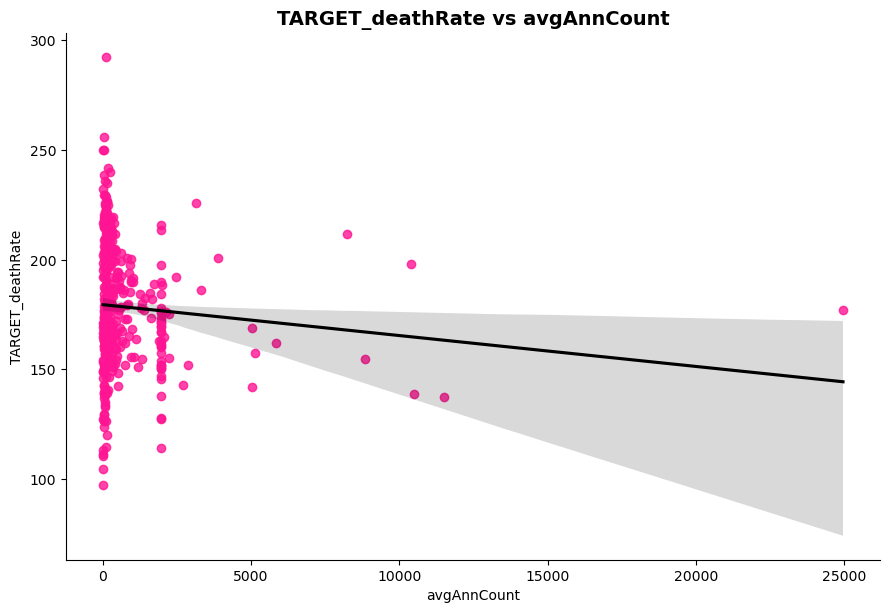

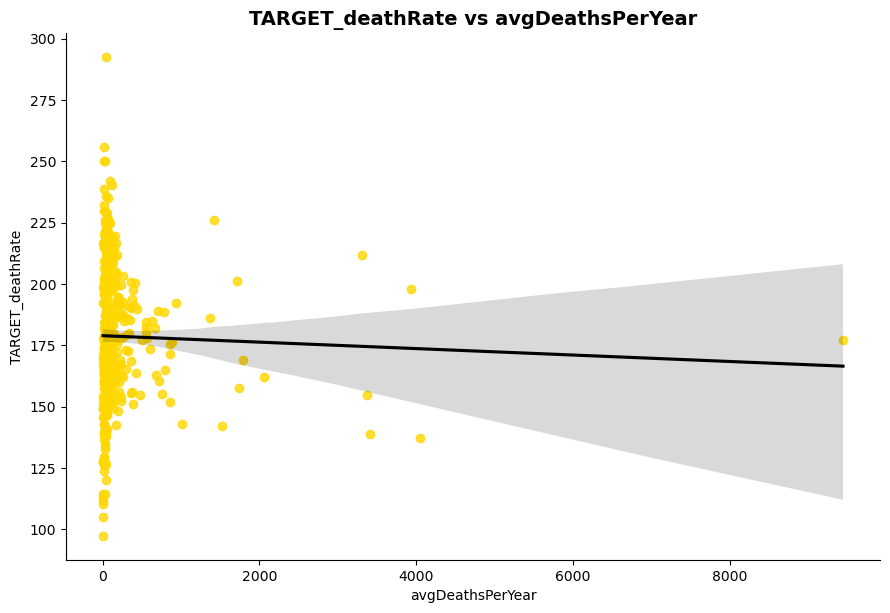

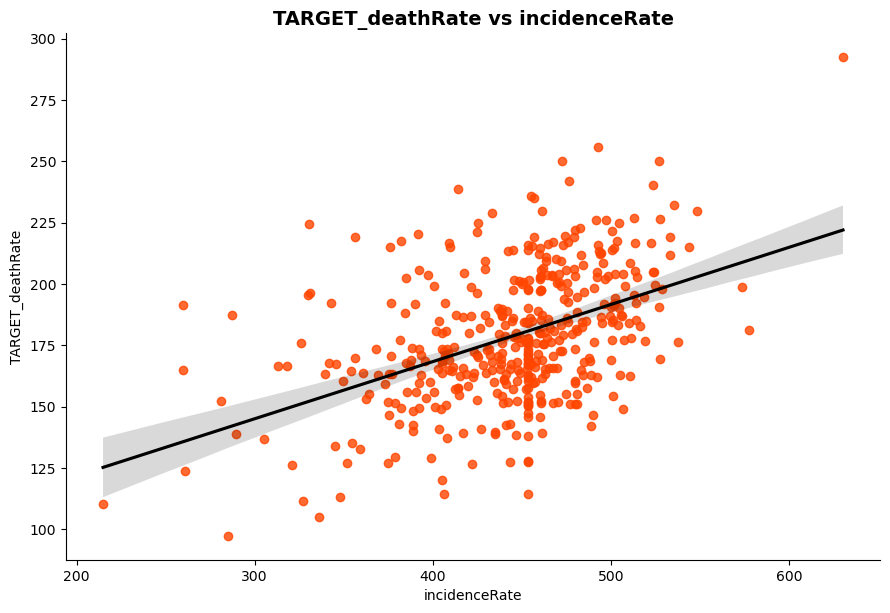

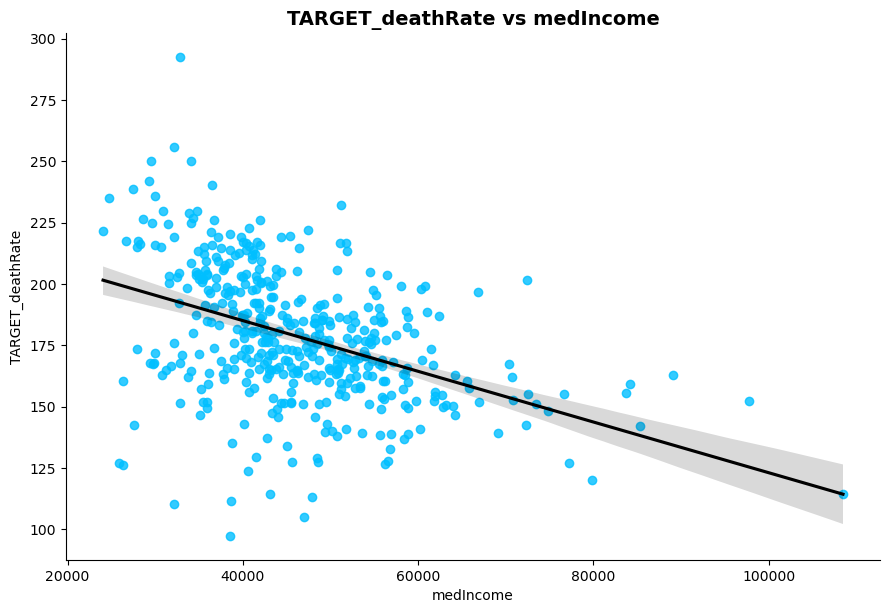

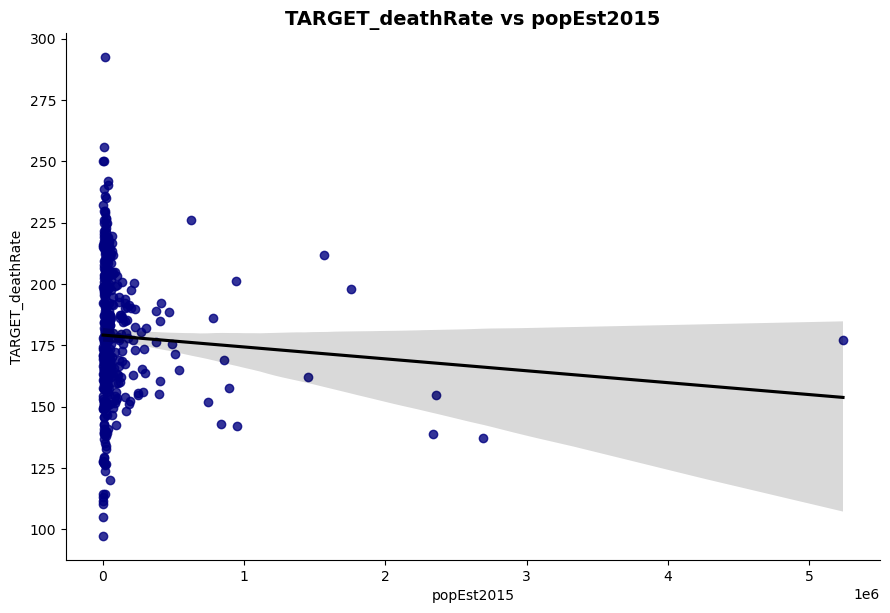

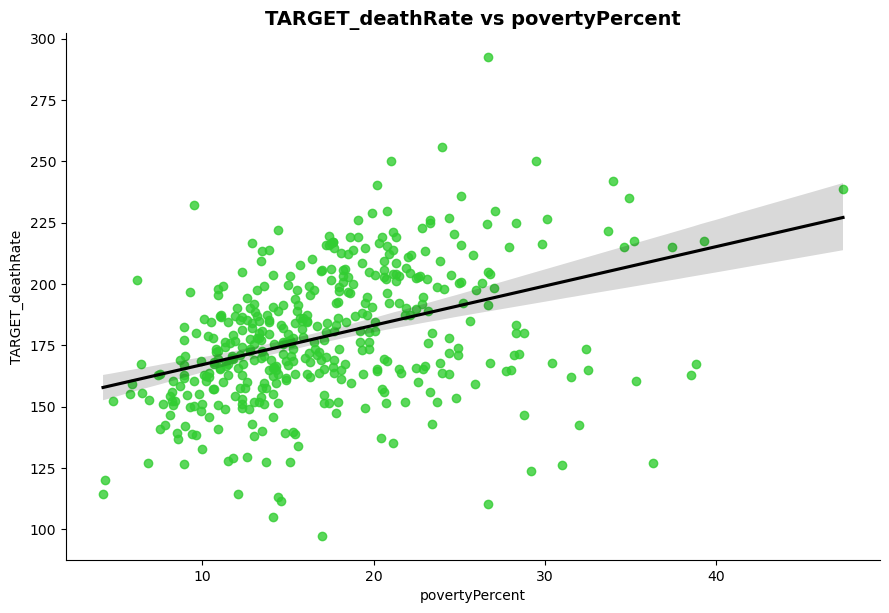

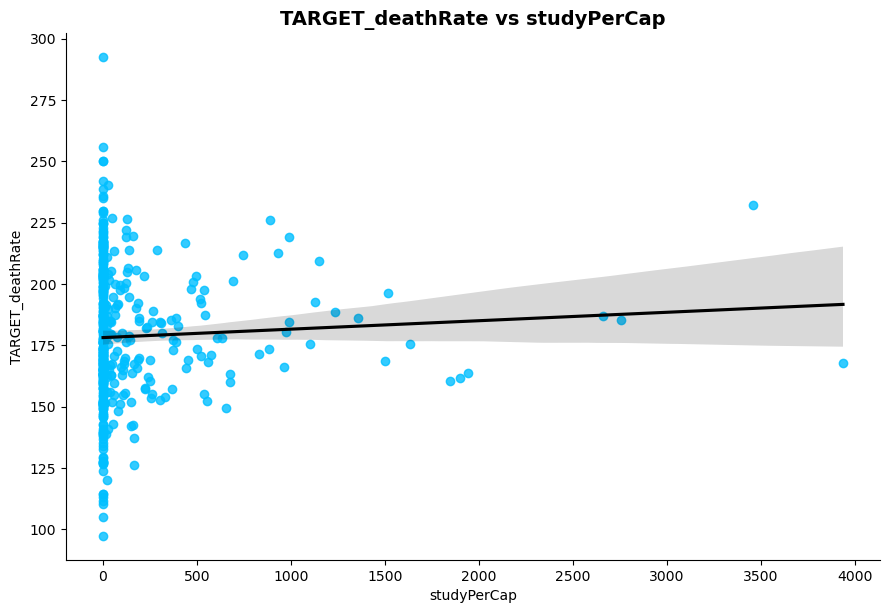

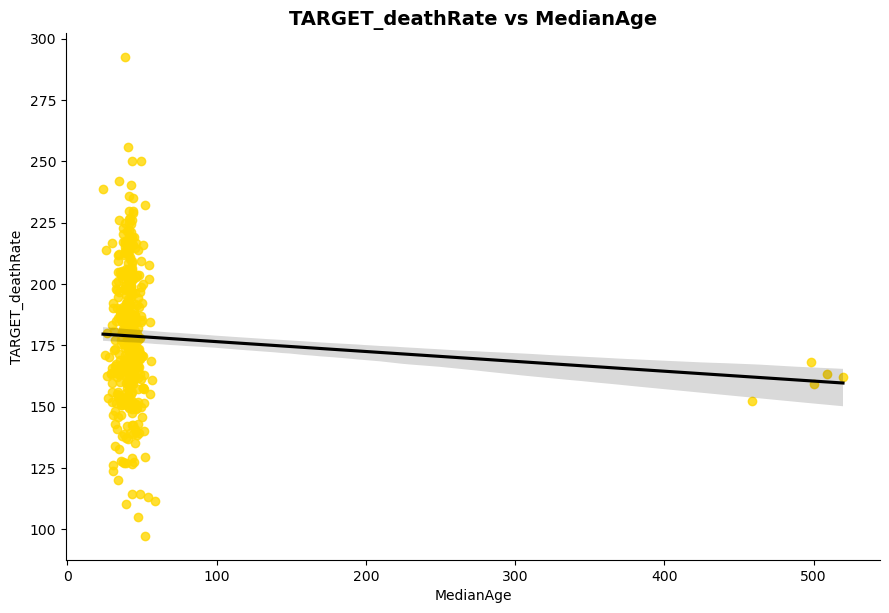

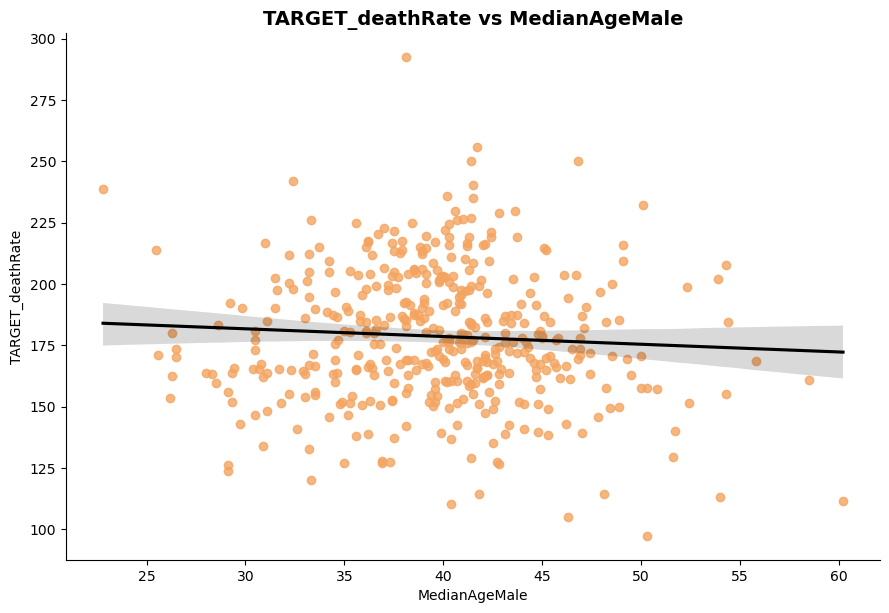

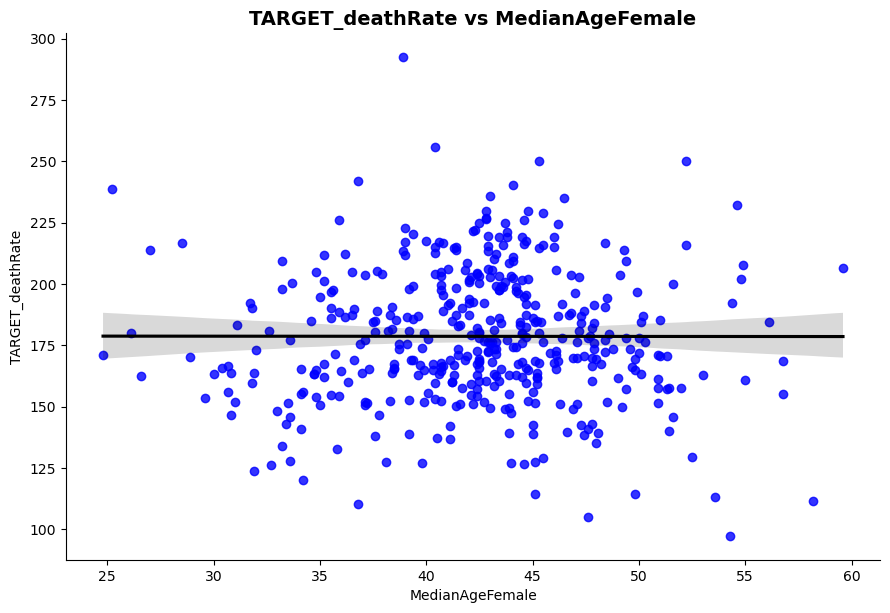

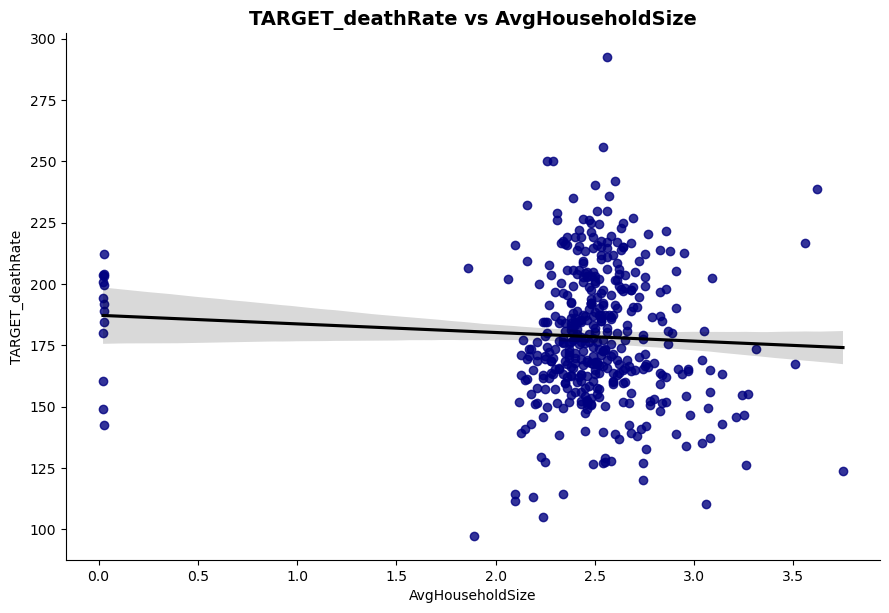

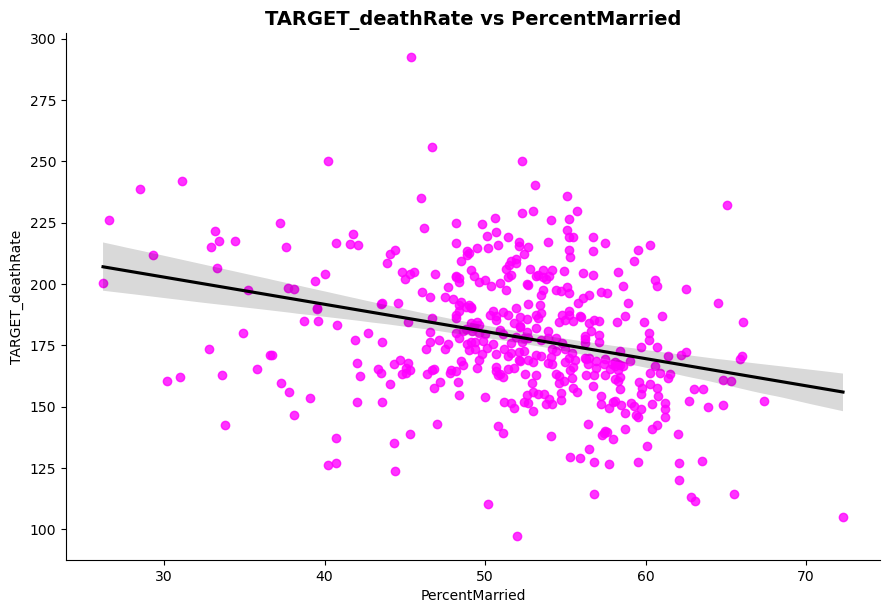

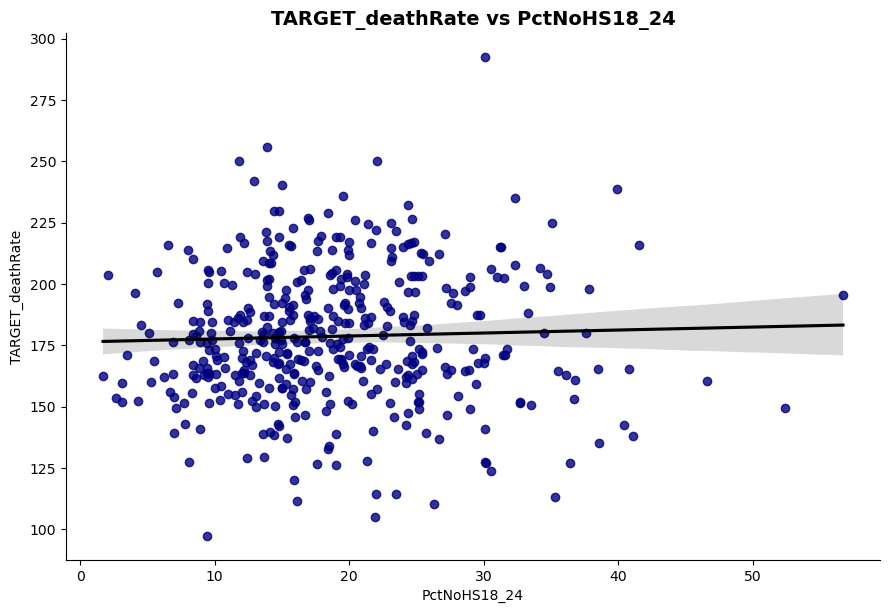

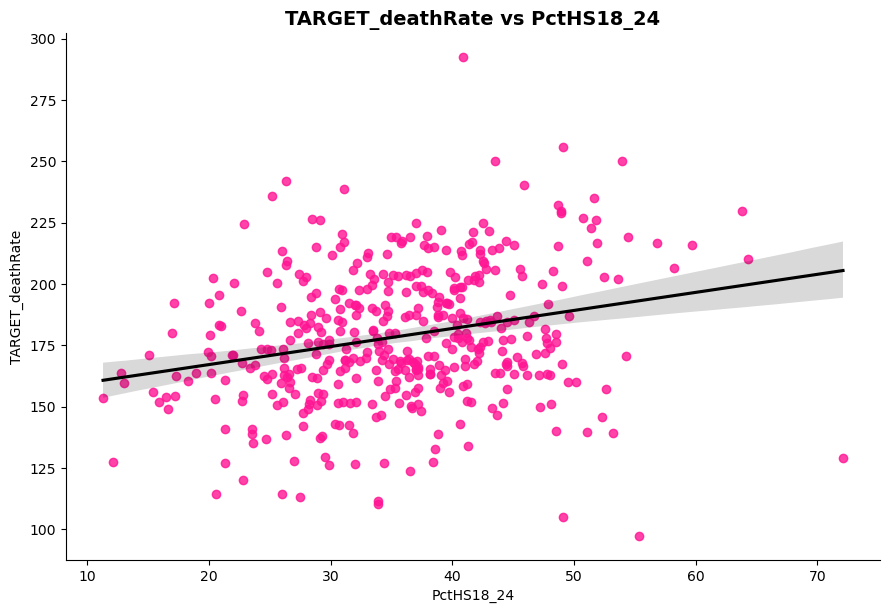

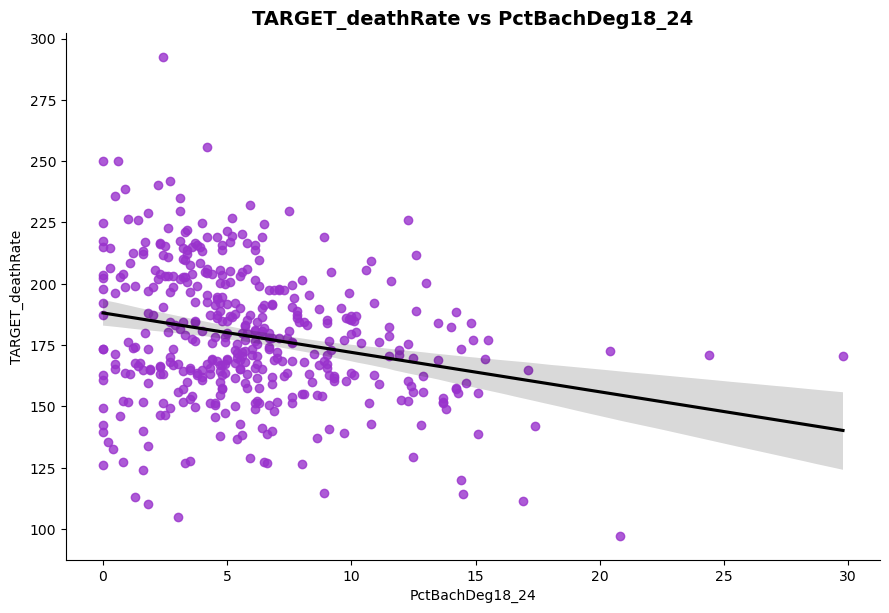

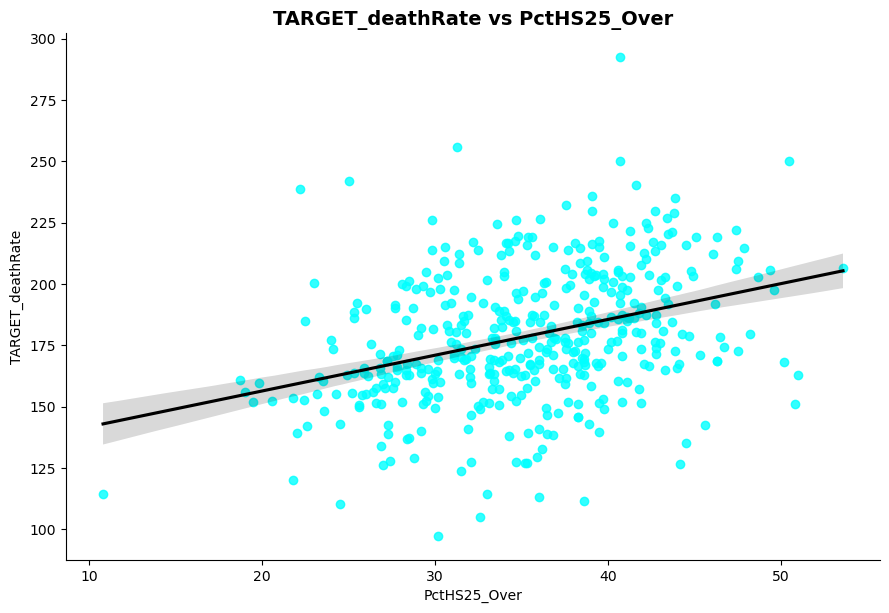

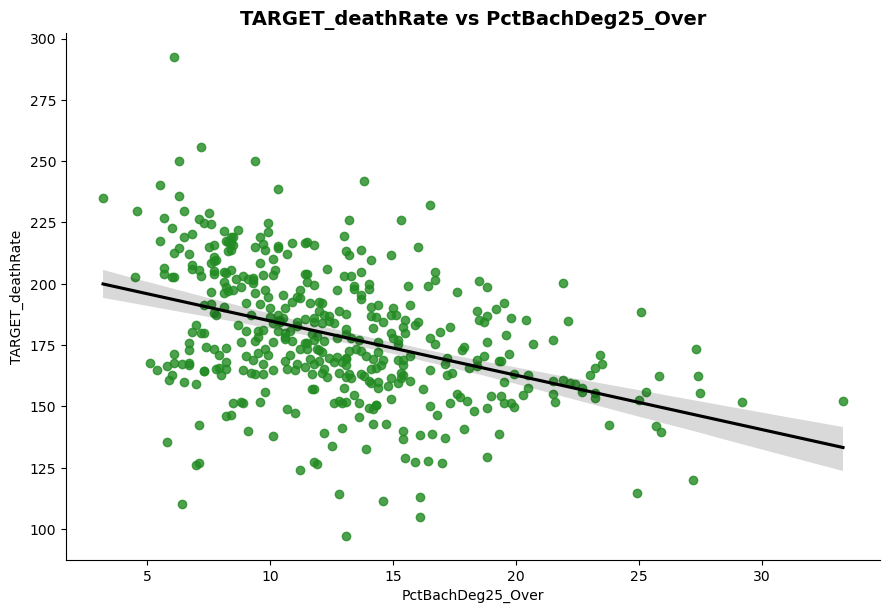

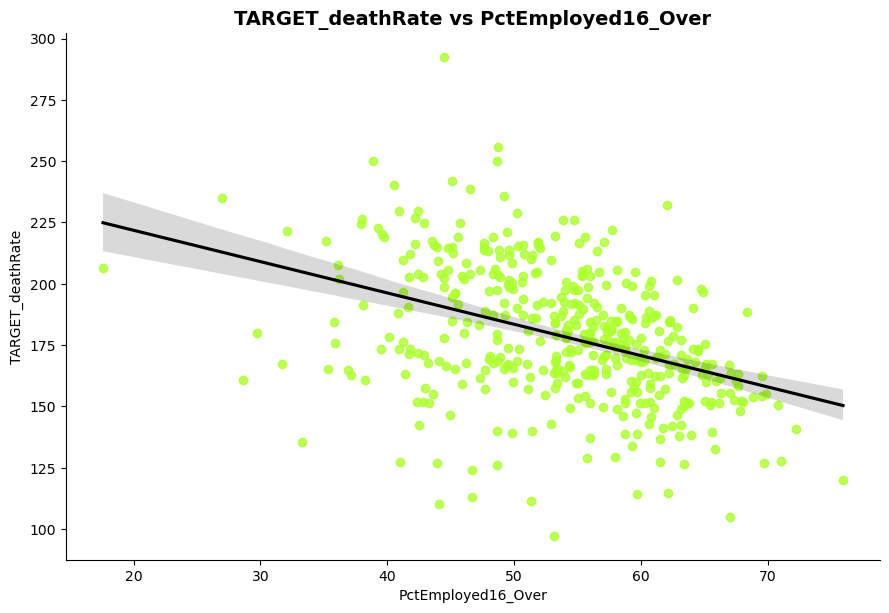

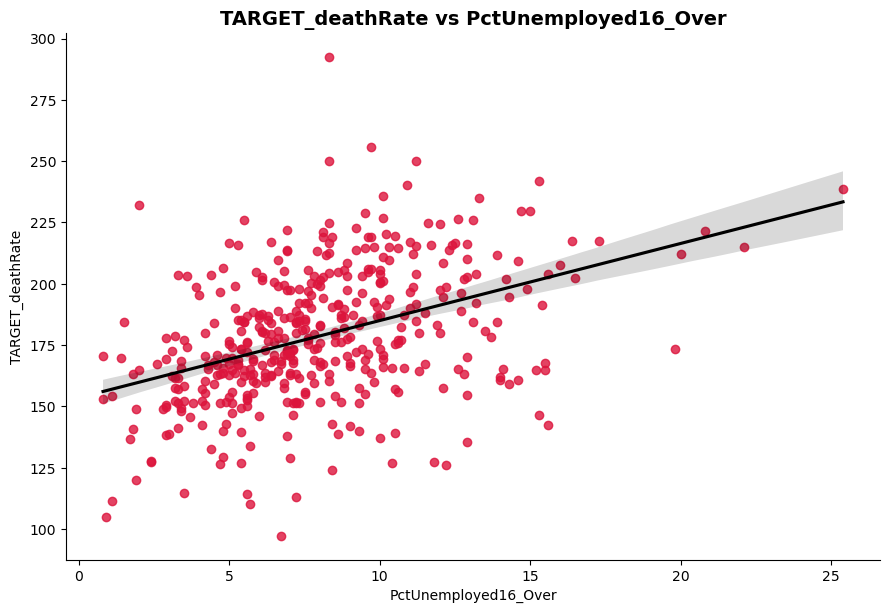

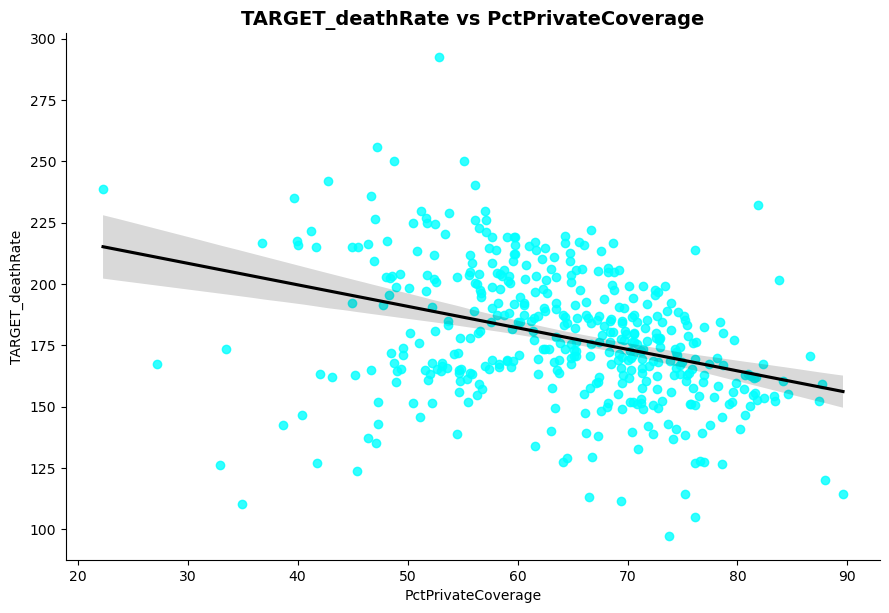

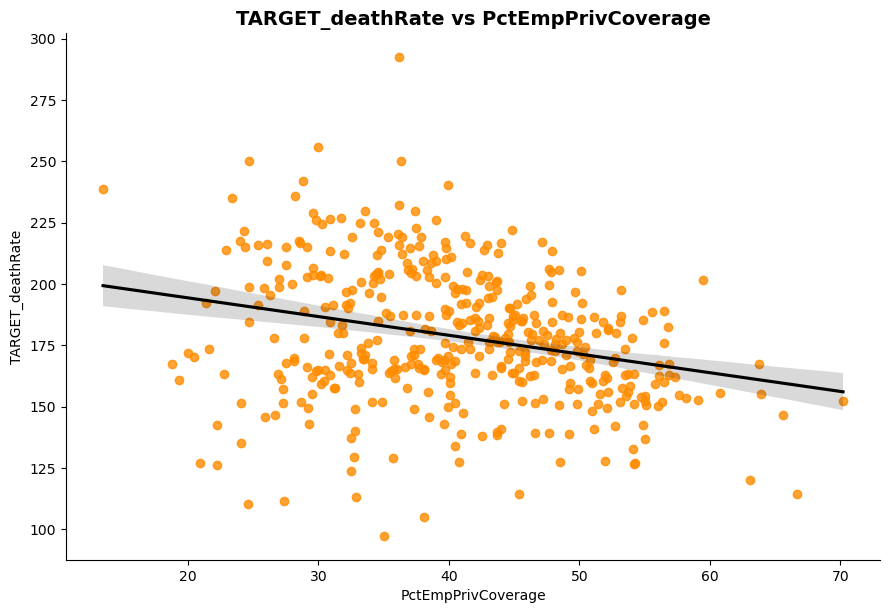

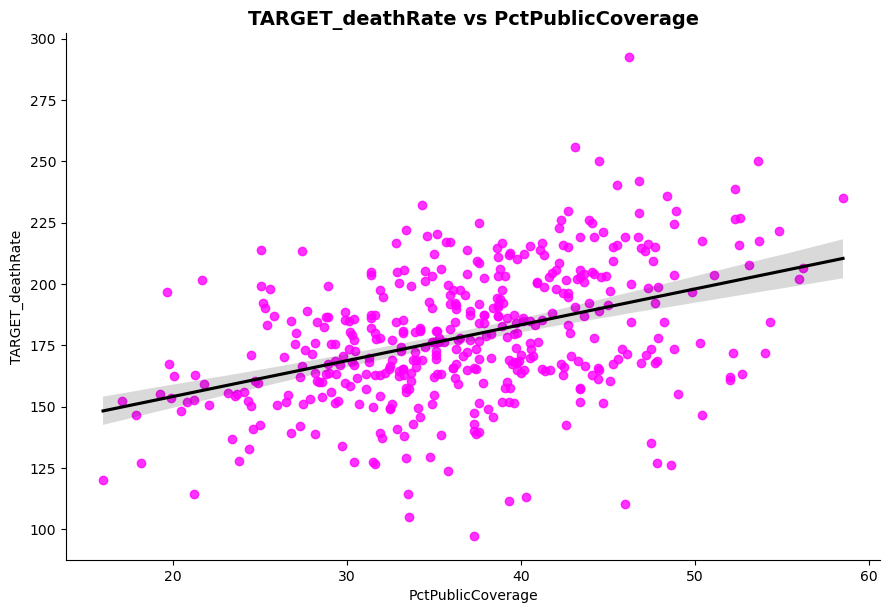

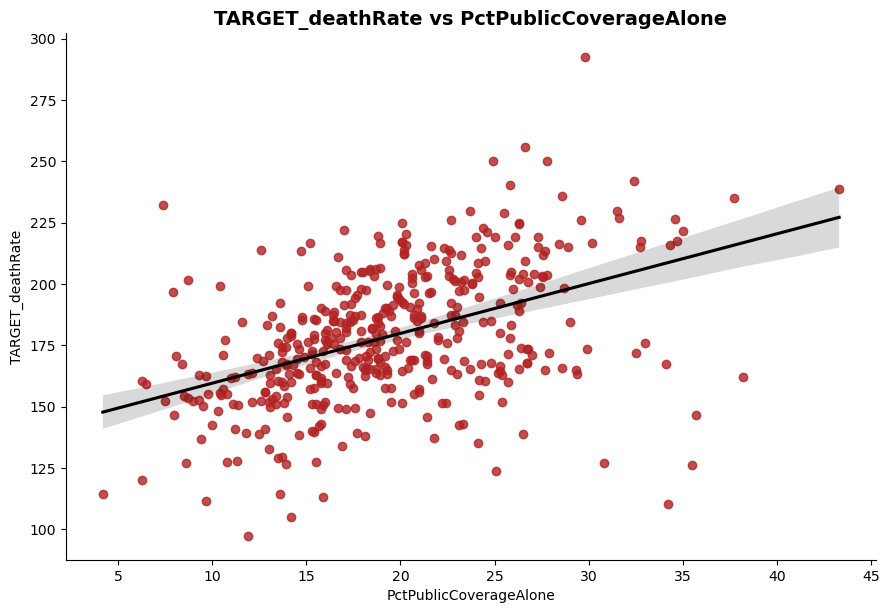

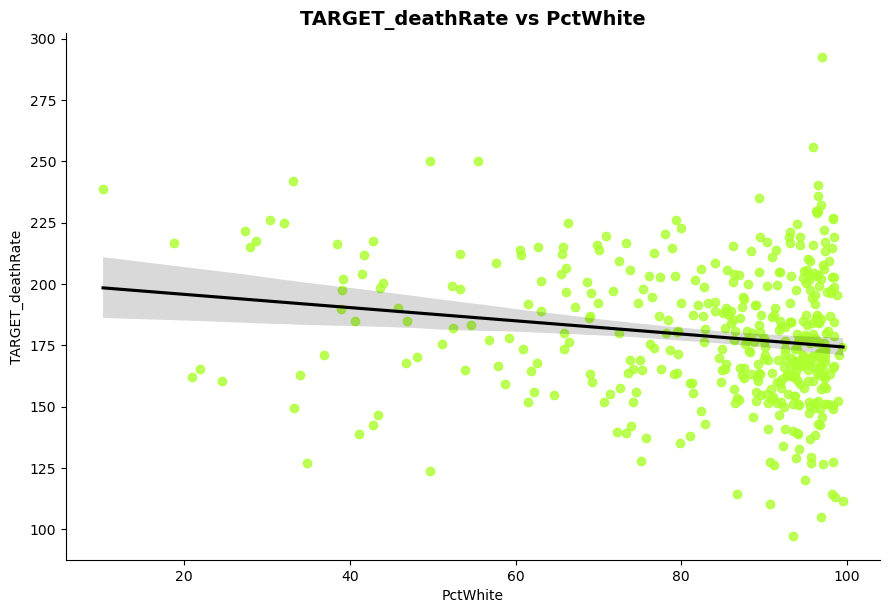

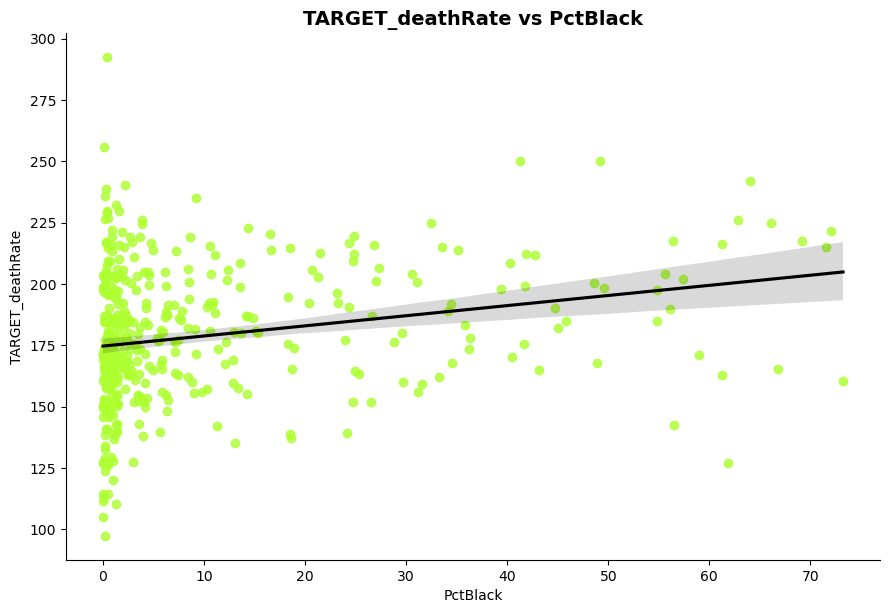

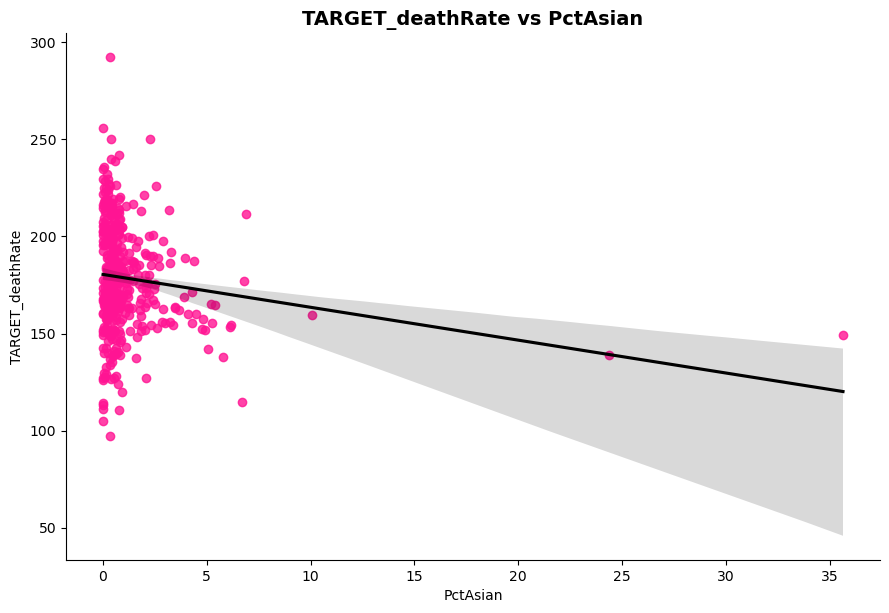

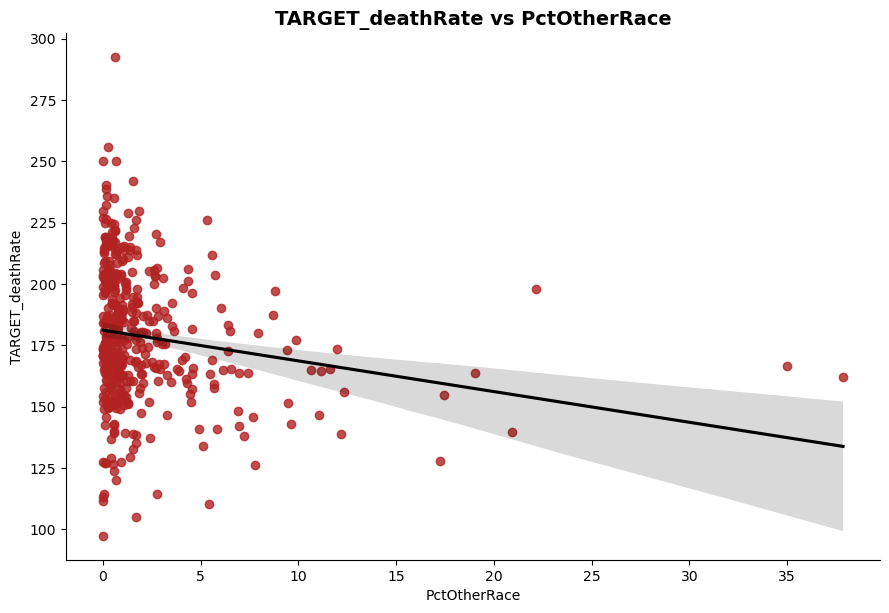

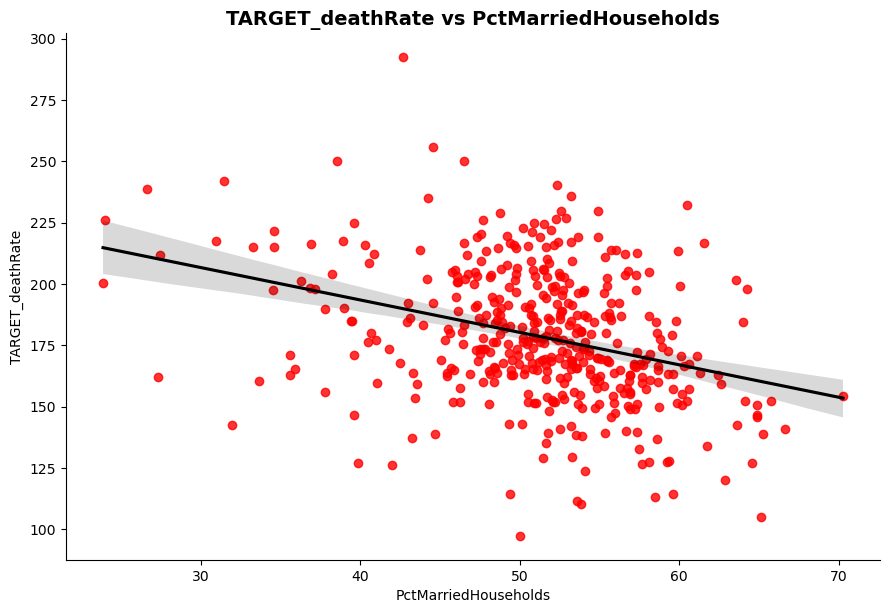

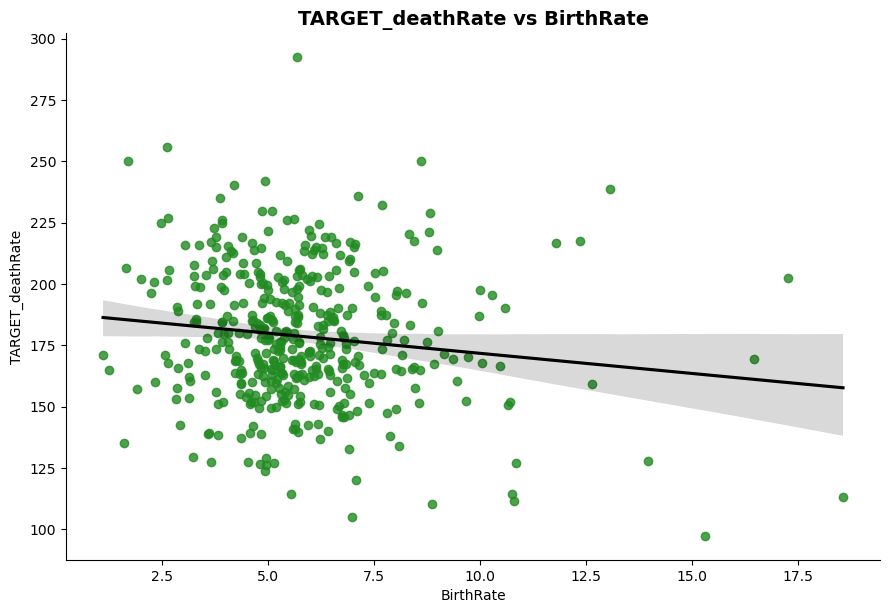

In [25]:
for i in range(0,len(Independent_variables)):
    
    x = sample[Independent_variables[i]]
    y = sample['TARGET_deathRate']
   

    sns.lmplot(x = Independent_variables[i], y = 'TARGET_deathRate' ,data = sample, height = 6, aspect = 1.5,
               scatter_kws = {'color' : rndm.choice(color_list)},
              line_kws = {'color' : 'black'})

    plt.title('TARGET_deathRate vs ' + Independent_variables[i], fontsize = 14, weight = 'bold')
    
    sns.despine()
    plt.show()

Some of the predictors seem to be completely uncorrelated with the dependent variable. For 
others, it looks like there is a correlation, but there is a lot of variance. Maybe the true form of the f(X) in not linear.

### 3.4 SEARCHING FOR OUTLIERS AND HIGH-LEVERAGE POINTS

__3.4.1 Initial scan with histograms__

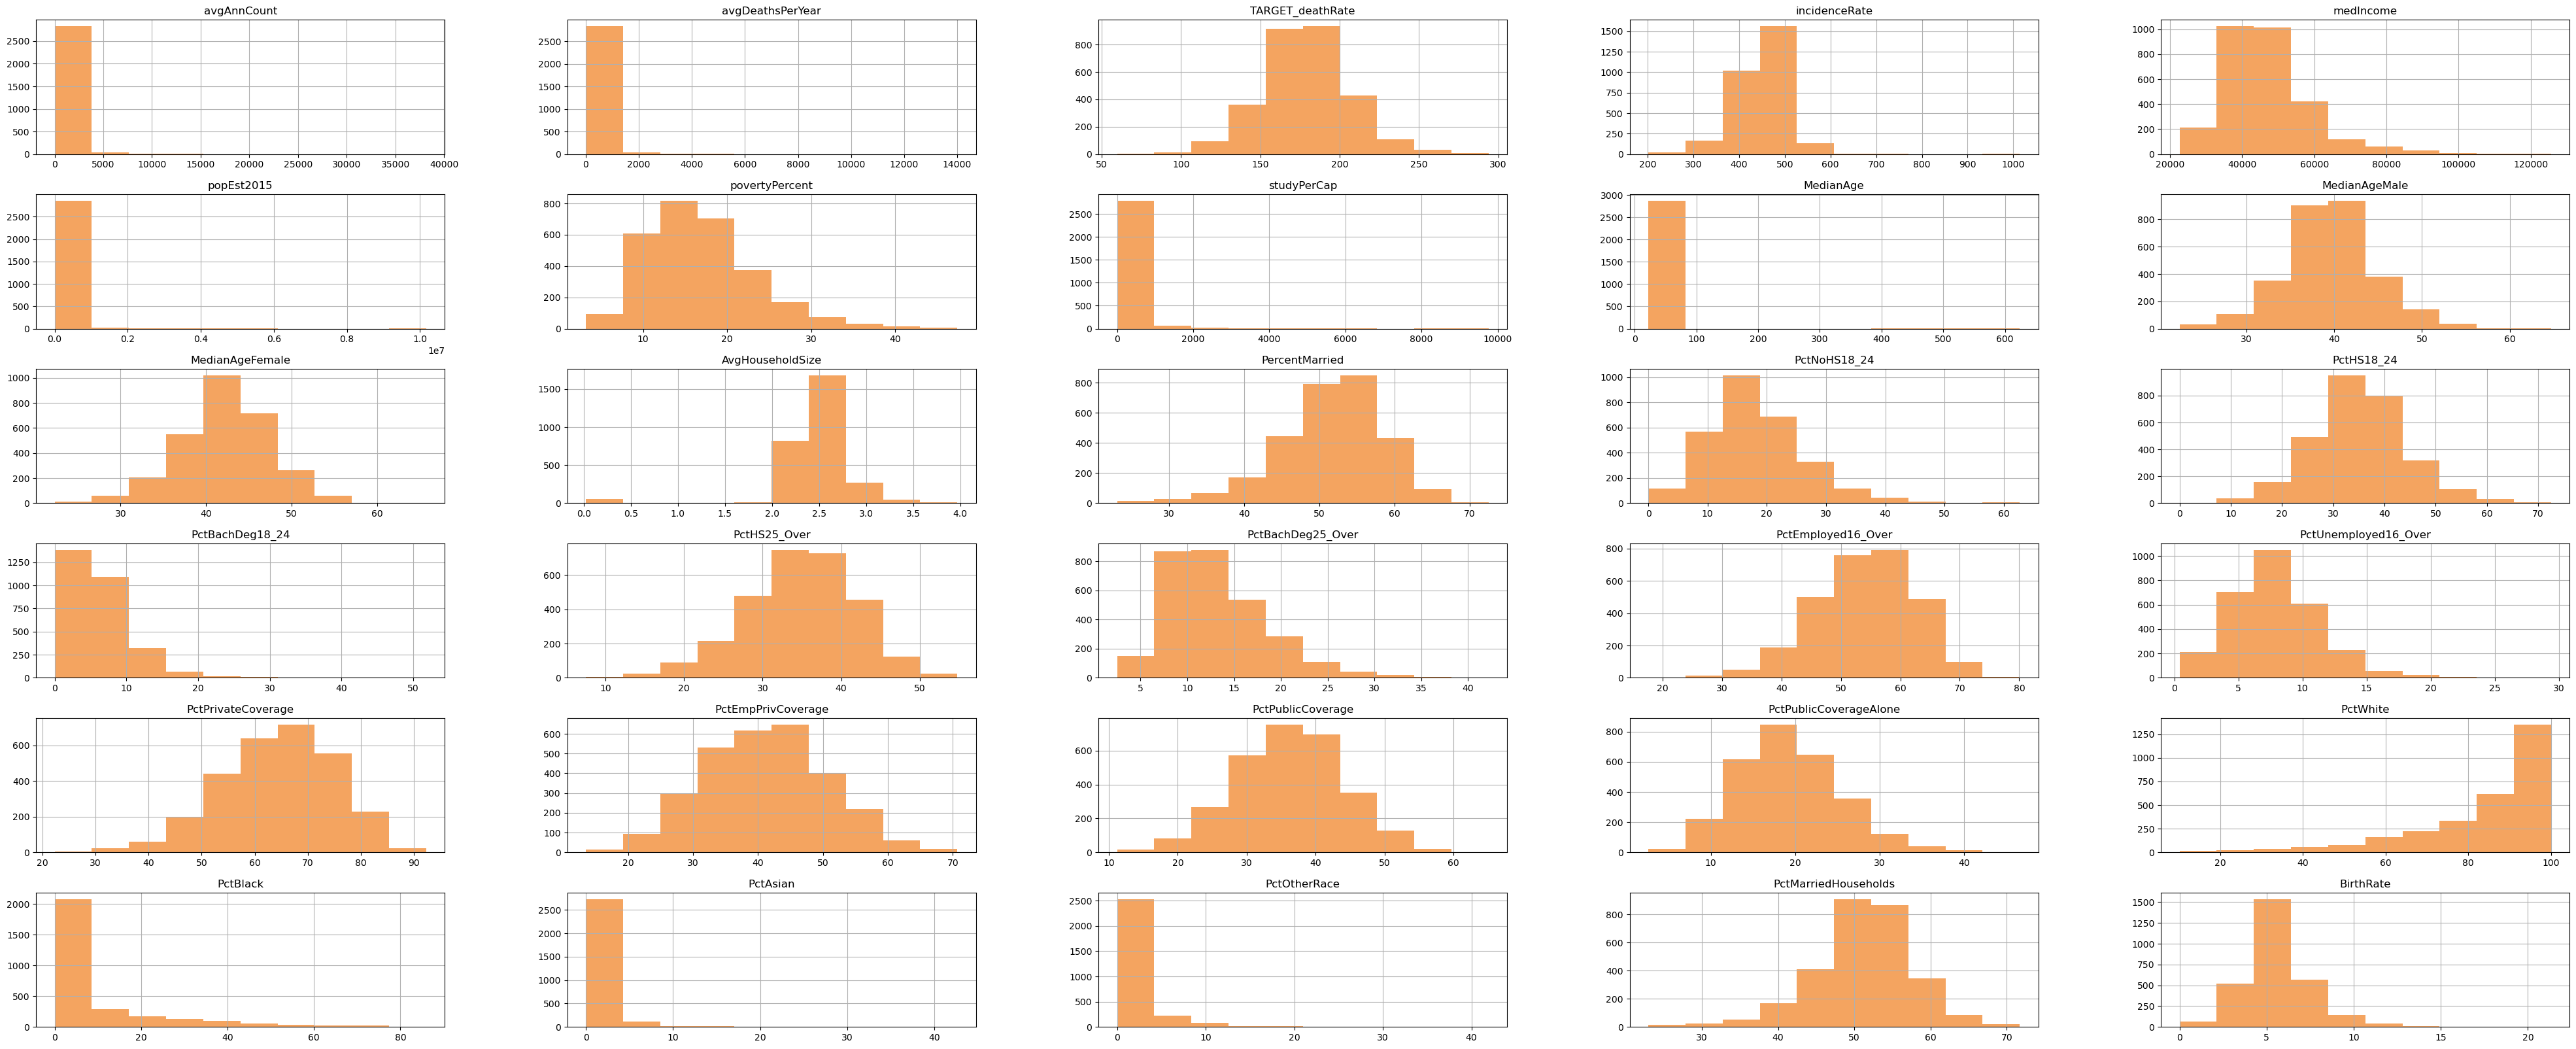

In [26]:
cancer_df.hist(figsize = (50,20),xlabelsize = 10 ,ylabelsize = 10, color = rndm.choice(color_list))
plt.show()

At first glance, most of the variables seem to be distributed in a "normal-way" or follow a specific 
pattern. Some variables seem to require further investigation. 

__3.4.2 Helpler functions__

In [27]:
# 1. Function that diplays histogram of the variable
def display_variable_hist(Variable):
    color_list = ["firebrick","red", "orangered", "chocolate", "sandybrown", "darkorange", "orange", "gold", "limegreen", 
                  "deepskyblue", "navy", "darkorchid", "magenta", "greenyellow", "yellowgreen", "forestgreen", "lime" ,
              "lightseagreen", "cyan", "dodgerblue", "crimson", "deeppink", "purple", "blue"]


    sns.set_style("white")
    
    plt.hist(cancer_df[Variable],
            bins = 10,
            color = rndm.choice(color_list))
    
    plt.title(label = "Distribution of " + Variable, fontsize = 14, weight = 'bold')
    
    sns.despine()
    
    plt.show()

In [28]:
# 2. Function that diplays the percentiles of the variable
def display_variable_percentiles(Variable):
    for i in range(0,105,5):
        print( np.percentile(cancer_df[Variable], i).round(2), "Percentile: ", i)

In [29]:
# 3. Function that shortens the dataframe
def df_shorten(Variable, v_short):
    global cancer_df
    print(len(cancer_df)) # Displaying the number of rows before "shortening"
    cancer_df = cancer_df[cancer_df[Variable]< v_short]
    print(len(cancer_df)) # Displaying the number of rows after "shortening"

__3.4.3 Outlier and hign-leverage-point deletion__

    1. avgAnnCount

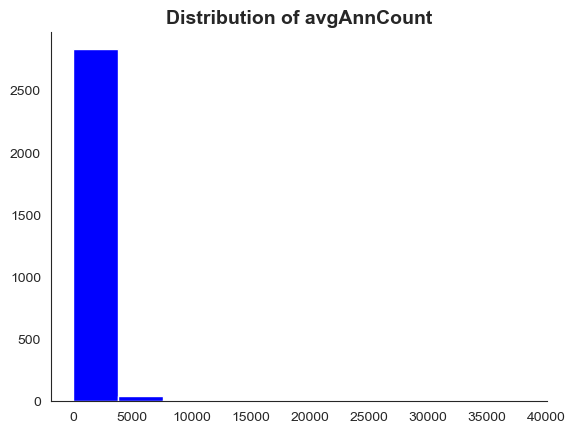

In [30]:
 # Histogram before "shortening"
display_variable_hist('avgAnnCount')

In [31]:
# Percentiles
display_variable_percentiles('avgAnnCount')

6.0 Percentile:  0
22.7 Percentile:  5
37.0 Percentile:  10
49.0 Percentile:  15
61.0 Percentile:  20
75.5 Percentile:  25
92.0 Percentile:  30
106.9 Percentile:  35
123.0 Percentile:  40
145.0 Percentile:  45
171.0 Percentile:  50
203.0 Percentile:  55
240.4 Percentile:  60
297.0 Percentile:  65
393.8 Percentile:  70
515.0 Percentile:  75
743.4 Percentile:  80
1194.5 Percentile:  85
1962.67 Percentile:  90
2015.6 Percentile:  95
38150.0 Percentile:  100


In [32]:
# Shortening the dataframe
df_shorten('avgAnnCount',15000)

2895
2892


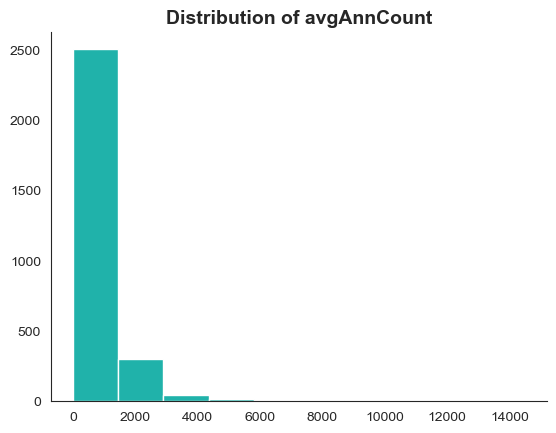

In [33]:
# Histogram after "shortening"
display_variable_hist('avgAnnCount')

    2. avgDeathsPerYear

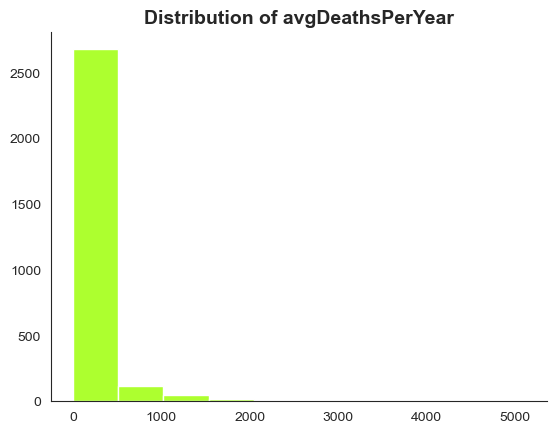

In [34]:
# Histogram before "shortening"
display_variable_hist('avgDeathsPerYear')

In [35]:
# Percentiles
display_variable_percentiles('avgDeathsPerYear')

3.0 Percentile:  0
9.0 Percentile:  5
14.0 Percentile:  10
18.0 Percentile:  15
23.0 Percentile:  20
28.0 Percentile:  25
33.0 Percentile:  30
40.0 Percentile:  35
47.0 Percentile:  40
53.0 Percentile:  45
61.0 Percentile:  50
70.0 Percentile:  55
83.0 Percentile:  60
98.0 Percentile:  65
117.0 Percentile:  70
147.0 Percentile:  75
185.0 Percentile:  80
244.05 Percentile:  85
376.8 Percentile:  90
755.7 Percentile:  95
5108.0 Percentile:  100


In [36]:
# Shortening the dataframe
df_shorten('avgDeathsPerYear',4000)

2892
2888


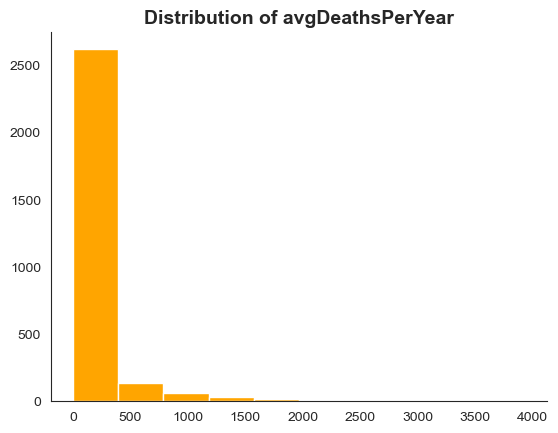

In [37]:
# Histogram after "shortening"
display_variable_hist('avgDeathsPerYear')

    3. TARGET_deathRate

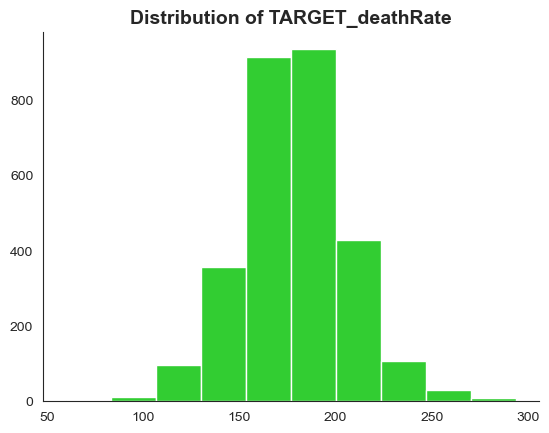

In [38]:
 # Histogram before "shortening"
display_variable_hist('TARGET_deathRate')

In [39]:
# Percentiles
display_variable_percentiles('TARGET_deathRate')

59.7 Percentile:  0
135.0 Percentile:  5
145.57 Percentile:  10
152.0 Percentile:  15
157.0 Percentile:  20
161.3 Percentile:  25
164.7 Percentile:  30
168.3 Percentile:  35
171.6 Percentile:  40
174.7 Percentile:  45
178.15 Percentile:  50
181.2 Percentile:  55
184.3 Percentile:  60
187.5 Percentile:  65
191.3 Percentile:  70
195.22 Percentile:  75
200.2 Percentile:  80
205.4 Percentile:  85
213.23 Percentile:  90
224.13 Percentile:  95
293.9 Percentile:  100


    4. incidenceRate

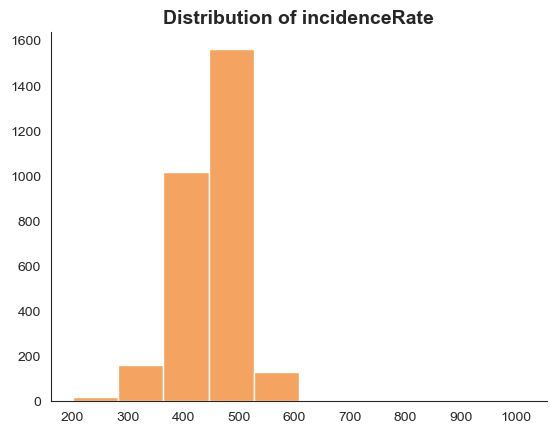

In [40]:
# Histogram before "shortening"
display_variable_hist('incidenceRate')

In [41]:
# Percentiles
display_variable_percentiles('incidenceRate')

201.3 Percentile:  0
355.24 Percentile:  5
381.0 Percentile:  10
399.0 Percentile:  15
410.18 Percentile:  20
420.38 Percentile:  25
428.1 Percentile:  30
435.24 Percentile:  35
443.28 Percentile:  40
450.32 Percentile:  45
453.55 Percentile:  50
455.38 Percentile:  55
460.9 Percentile:  60
467.4 Percentile:  65
473.5 Percentile:  70
480.72 Percentile:  75
488.0 Percentile:  80
495.28 Percentile:  85
507.33 Percentile:  90
524.86 Percentile:  95
1014.2 Percentile:  100


In [42]:
# Shortening the dataframe
df_shorten('incidenceRate', 650)

2888
2885


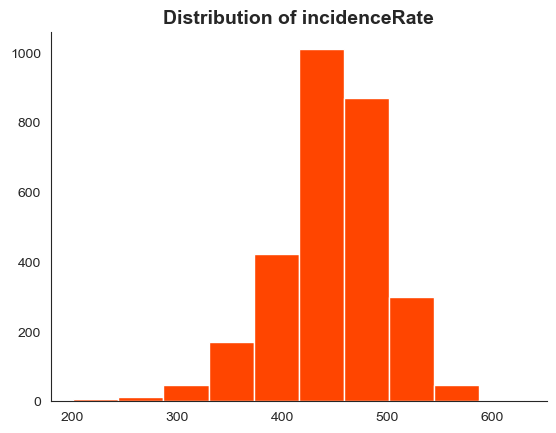

In [43]:
# Histogram after "shortening"
display_variable_hist('incidenceRate')

    5. medIncome

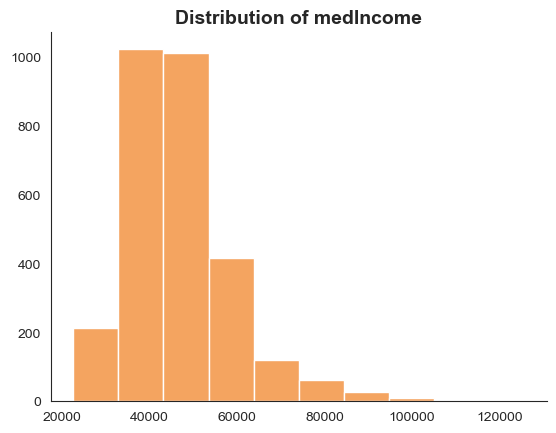

In [44]:
# Histogram before "shortening"
display_variable_hist('medIncome')

In [45]:
# Percentiles
display_variable_percentiles('medIncome')

22640.0 Percentile:  0
31821.8 Percentile:  5
34116.0 Percentile:  10
35890.6 Percentile:  15
37315.0 Percentile:  20
38742.0 Percentile:  25
40258.4 Percentile:  30
41397.4 Percentile:  35
42616.4 Percentile:  40
43783.0 Percentile:  45
45082.0 Percentile:  50
46505.0 Percentile:  55
47993.0 Percentile:  60
49566.2 Percentile:  65
51031.2 Percentile:  70
52444.0 Percentile:  75
54468.8 Percentile:  80
57209.2 Percentile:  85
61179.8 Percentile:  90
69431.6 Percentile:  95
125635.0 Percentile:  100


In [46]:
# Shortening the dataframe
df_shorten('medIncome', 118000)

2885
2883


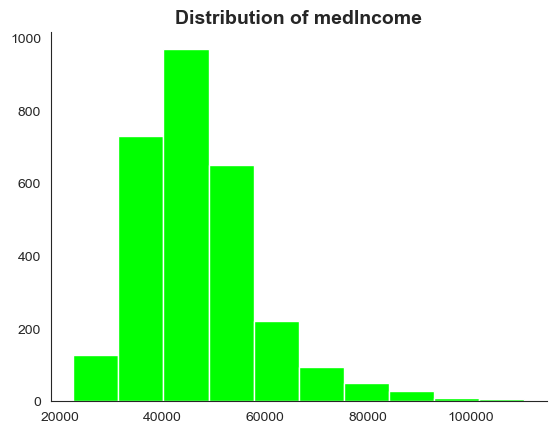

In [47]:
# Histogram after "shortening"
display_variable_hist('medIncome')

    6. popEst2015

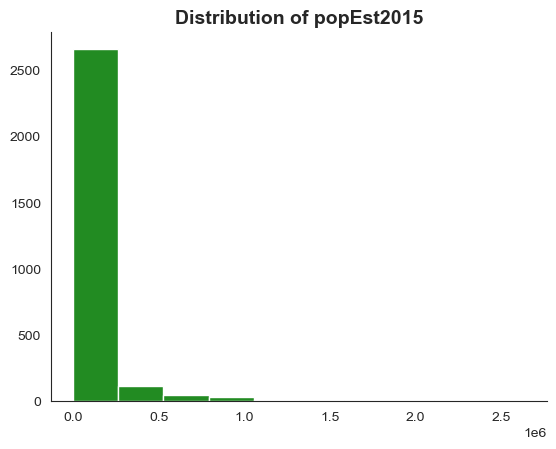

In [48]:
# Histogram before "shortening"
display_variable_hist('popEst2015')

In [49]:
# Percentiles
display_variable_percentiles('popEst2015')

827.0 Percentile:  0
3654.2 Percentile:  5
5776.0 Percentile:  10
7656.9 Percentile:  15
9496.4 Percentile:  20
11564.0 Percentile:  25
14035.6 Percentile:  30
16447.4 Percentile:  35
19342.4 Percentile:  40
22628.0 Percentile:  45
26395.0 Percentile:  50
31476.3 Percentile:  55
37151.6 Percentile:  60
43769.3 Percentile:  65
52971.6 Percentile:  70
67411.5 Percentile:  75
91560.0 Percentile:  80
133006.9 Percentile:  85
202623.4 Percentile:  90
433877.1 Percentile:  95
2636735.0 Percentile:  100


In [50]:
# Shortening the dataframe
df_shorten('popEst2015',420000 )

2883
2736


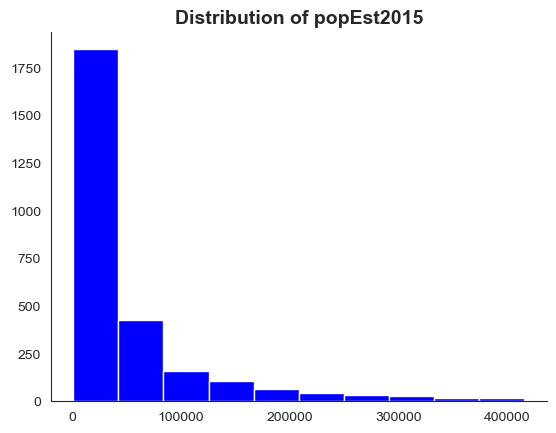

In [51]:
# Histogram after "shortening"
display_variable_hist('popEst2015')

    7. povertyPercent

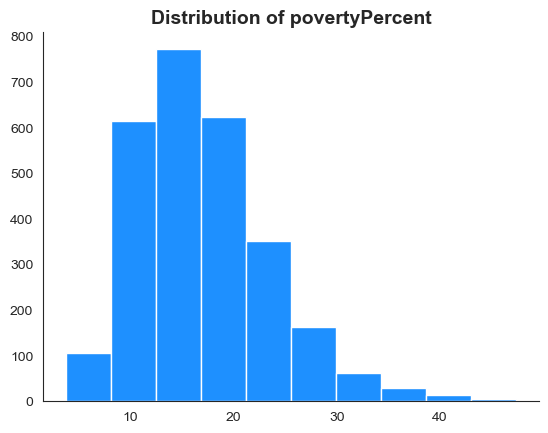

In [52]:
# Histogram before "shortening"
display_variable_hist('povertyPercent')

In [53]:
# Percentiles
display_variable_percentiles('povertyPercent')

3.7 Percentile:  0
8.57 Percentile:  5
9.9 Percentile:  10
10.7 Percentile:  15
11.5 Percentile:  20
12.28 Percentile:  25
13.0 Percentile:  30
13.8 Percentile:  35
14.5 Percentile:  40
15.28 Percentile:  45
16.05 Percentile:  50
16.9 Percentile:  55
17.8 Percentile:  60
18.7 Percentile:  65
19.6 Percentile:  70
20.6 Percentile:  75
21.9 Percentile:  80
23.4 Percentile:  85
25.5 Percentile:  90
28.9 Percentile:  95
47.4 Percentile:  100


    8. studyPerCap

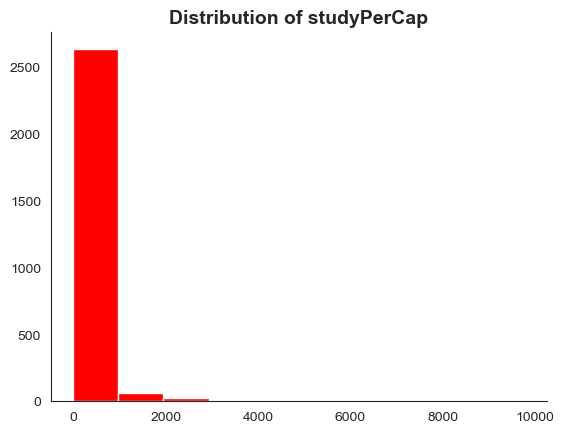

In [54]:
# Histogram before "shortening"
display_variable_hist('studyPerCap')

In [55]:
# Percentiles
display_variable_percentiles('studyPerCap')

0.0 Percentile:  0
0.0 Percentile:  5
0.0 Percentile:  10
0.0 Percentile:  15
0.0 Percentile:  20
0.0 Percentile:  25
0.0 Percentile:  30
0.0 Percentile:  35
0.0 Percentile:  40
0.0 Percentile:  45
0.0 Percentile:  50
0.0 Percentile:  55
0.0 Percentile:  60
0.0 Percentile:  65
22.22 Percentile:  70
51.16 Percentile:  75
105.57 Percentile:  80
191.45 Percentile:  85
368.47 Percentile:  90
728.92 Percentile:  95
9762.31 Percentile:  100


In [56]:
# Shortening the dataframe
df_shorten('studyPerCap', 5000 )

2736
2732


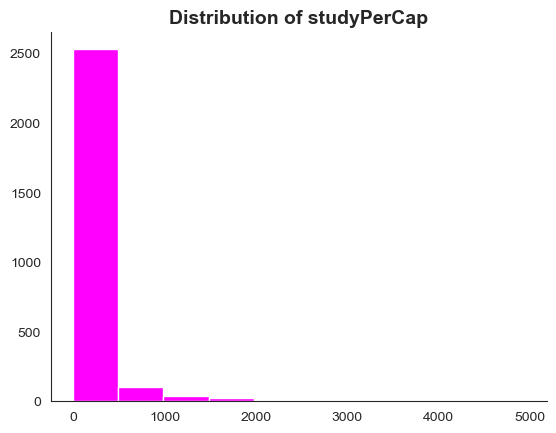

In [57]:
# Histogram after "shortening"
display_variable_hist('studyPerCap')

    9. MedianAge

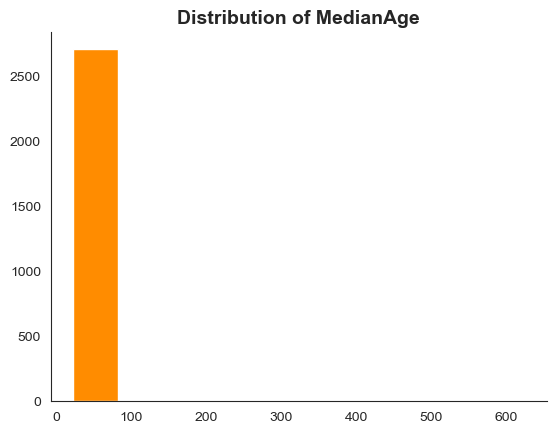

In [58]:
# Histogram before "shortening"
display_variable_hist('MedianAge')

In [59]:
# Percentiles
display_variable_percentiles('MedianAge')

22.3 Percentile:  0
32.1 Percentile:  5
34.7 Percentile:  10
36.0 Percentile:  15
37.1 Percentile:  20
38.1 Percentile:  25
38.8 Percentile:  30
39.5 Percentile:  35
40.1 Percentile:  40
40.7 Percentile:  45
41.2 Percentile:  50
41.7 Percentile:  55
42.3 Percentile:  60
42.8 Percentile:  65
43.5 Percentile:  70
44.2 Percentile:  75
45.1 Percentile:  80
46.3 Percentile:  85
47.9 Percentile:  90
50.4 Percentile:  95
624.0 Percentile:  100


In [60]:
# Shortening the dataframe
df_shorten('MedianAge', 100) # KIND OF RARE FOR SOMEONE TO BE MORE 600 YR OLD!!!

2732
2706


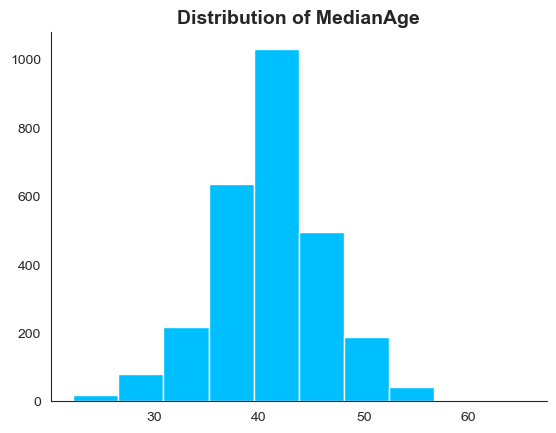

In [61]:
# Histogram after "shortening"
display_variable_hist('MedianAge')

    10. MedianAgeMale

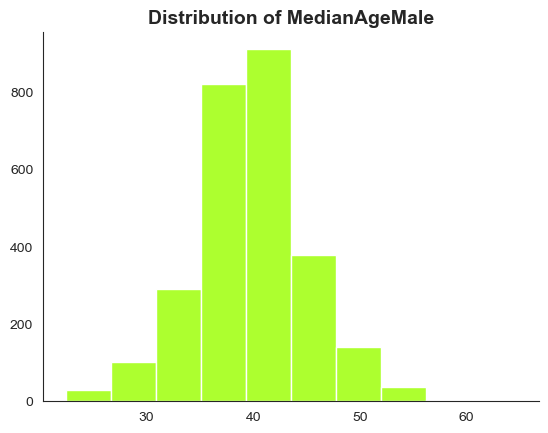

In [62]:
# Histogram before "shortening"
display_variable_hist('MedianAgeMale')

In [63]:
# Percentiles
display_variable_percentiles('MedianAgeMale')

22.4 Percentile:  0
31.0 Percentile:  5
33.45 Percentile:  10
34.9 Percentile:  15
35.8 Percentile:  20
36.6 Percentile:  25
37.4 Percentile:  30
38.1 Percentile:  35
38.7 Percentile:  40
39.3 Percentile:  45
39.9 Percentile:  50
40.3 Percentile:  55
40.8 Percentile:  60
41.4 Percentile:  65
42.1 Percentile:  70
42.8 Percentile:  75
43.7 Percentile:  80
44.9 Percentile:  85
46.3 Percentile:  90
48.9 Percentile:  95
64.7 Percentile:  100


    11. MedianAgeFemale

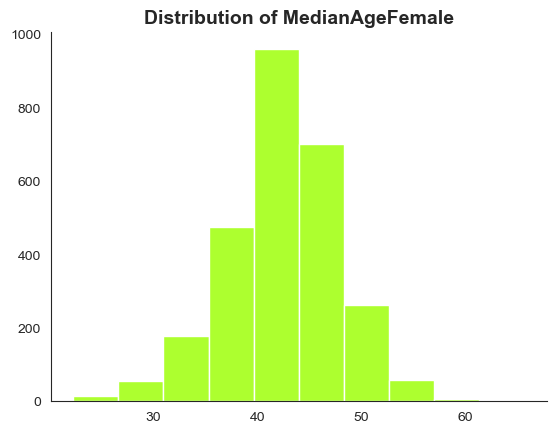

In [64]:
# Histogram before "shortening"
display_variable_hist('MedianAgeFemale')

In [65]:
# Percentiles
display_variable_percentiles('MedianAgeFemale')

22.3 Percentile:  0
33.0 Percentile:  5
35.7 Percentile:  10
37.2 Percentile:  15
38.5 Percentile:  20
39.4 Percentile:  25
40.2 Percentile:  30
40.9 Percentile:  35
41.5 Percentile:  40
42.1 Percentile:  45
42.6 Percentile:  50
43.1 Percentile:  55
43.7 Percentile:  60
44.3 Percentile:  65
44.9 Percentile:  70
45.5 Percentile:  75
46.5 Percentile:  80
47.6 Percentile:  85
48.8 Percentile:  90
50.9 Percentile:  95
65.7 Percentile:  100


    12. AvgHouseholdSize

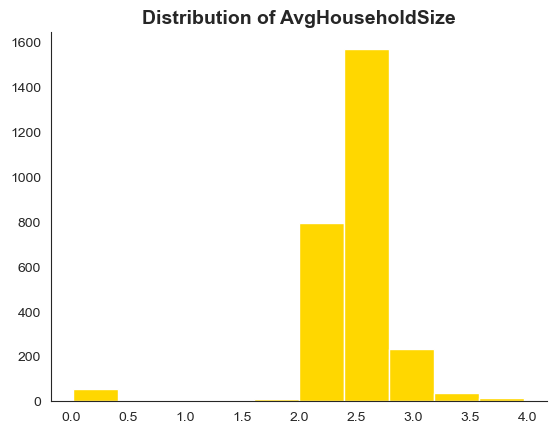

In [66]:
# Histogram before "shortening"
display_variable_hist('AvgHouseholdSize')

In [67]:
# Percentiles
display_variable_percentiles('AvgHouseholdSize')

0.02 Percentile:  0
2.14 Percentile:  5
2.24 Percentile:  10
2.28 Percentile:  15
2.33 Percentile:  20
2.36 Percentile:  25
2.39 Percentile:  30
2.41 Percentile:  35
2.44 Percentile:  40
2.46 Percentile:  45
2.49 Percentile:  50
2.51 Percentile:  55
2.54 Percentile:  60
2.56 Percentile:  65
2.59 Percentile:  70
2.62 Percentile:  75
2.67 Percentile:  80
2.72 Percentile:  85
2.79 Percentile:  90
2.95 Percentile:  95
3.97 Percentile:  100


    13. PercentMarried

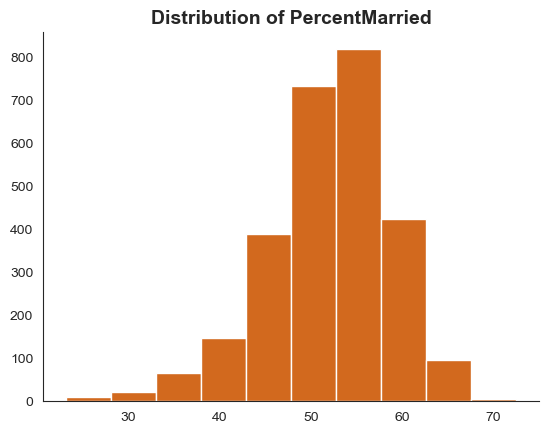

In [68]:
# Histogram before "shortening"
display_variable_hist('PercentMarried')

In [69]:
# Percentiles
display_variable_percentiles('PercentMarried')

23.1 Percentile:  0
39.6 Percentile:  5
43.5 Percentile:  10
45.5 Percentile:  15
46.9 Percentile:  20
48.2 Percentile:  25
49.3 Percentile:  30
50.3 Percentile:  35
51.2 Percentile:  40
52.1 Percentile:  45
52.7 Percentile:  50
53.5 Percentile:  55
54.3 Percentile:  60
55.0 Percentile:  65
55.7 Percentile:  70
56.6 Percentile:  75
57.5 Percentile:  80
58.7 Percentile:  85
60.2 Percentile:  90
62.0 Percentile:  95
72.5 Percentile:  100


    14. PctNoHS18_24

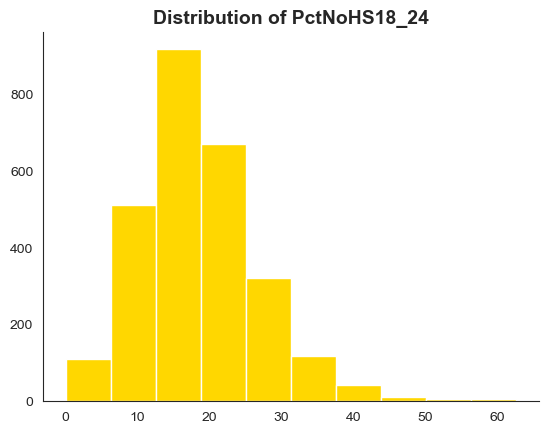

In [70]:
# Histogram before "shortening"
display_variable_hist('PctNoHS18_24')

In [71]:
# Percentiles
display_variable_percentiles('PctNoHS18_24')

0.0 Percentile:  0
6.9 Percentile:  5
8.9 Percentile:  10
10.58 Percentile:  15
11.9 Percentile:  20
12.9 Percentile:  25
14.0 Percentile:  30
14.9 Percentile:  35
15.8 Percentile:  40
16.7 Percentile:  45
17.55 Percentile:  50
18.5 Percentile:  55
19.5 Percentile:  60
20.5 Percentile:  65
21.5 Percentile:  70
23.1 Percentile:  75
24.6 Percentile:  80
26.3 Percentile:  85
28.9 Percentile:  90
33.45 Percentile:  95
62.7 Percentile:  100


    15. PctHS18_24

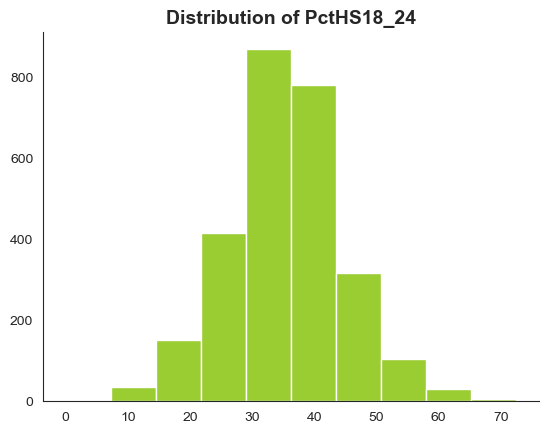

In [72]:
# Histogram before "shortening"
display_variable_hist('PctHS18_24')

In [73]:
# Percentiles
display_variable_percentiles('PctHS18_24')

0.0 Percentile:  0
20.3 Percentile:  5
23.7 Percentile:  10
26.3 Percentile:  15
28.3 Percentile:  20
29.7 Percentile:  25
31.1 Percentile:  30
32.1 Percentile:  35
33.2 Percentile:  40
34.3 Percentile:  45
35.3 Percentile:  50
36.4 Percentile:  55
37.6 Percentile:  60
38.7 Percentile:  65
39.8 Percentile:  70
41.0 Percentile:  75
42.3 Percentile:  80
44.2 Percentile:  85
46.6 Percentile:  90
50.98 Percentile:  95
72.5 Percentile:  100


    16. PctBachDeg18_24

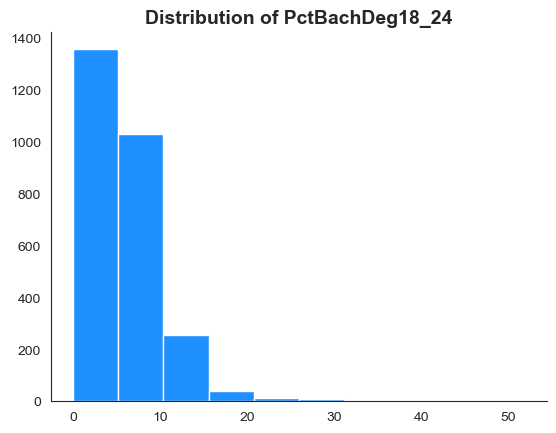

In [74]:
# Histogram before "shortening"
display_variable_hist('PctBachDeg18_24')

In [75]:
# Percentiles
display_variable_percentiles('PctBachDeg18_24')

0.0 Percentile:  0
0.5 Percentile:  5
1.3 Percentile:  10
2.0 Percentile:  15
2.5 Percentile:  20
2.92 Percentile:  25
3.4 Percentile:  30
3.8 Percentile:  35
4.3 Percentile:  40
4.8 Percentile:  45
5.1 Percentile:  50
5.6 Percentile:  55
6.1 Percentile:  60
6.5 Percentile:  65
7.1 Percentile:  70
7.8 Percentile:  75
8.6 Percentile:  80
9.5 Percentile:  85
10.9 Percentile:  90
13.28 Percentile:  95
51.8 Percentile:  100


In [76]:
# Shortening the dataframe
df_shorten('PctBachDeg18_24', 40 ) 

2706
2703


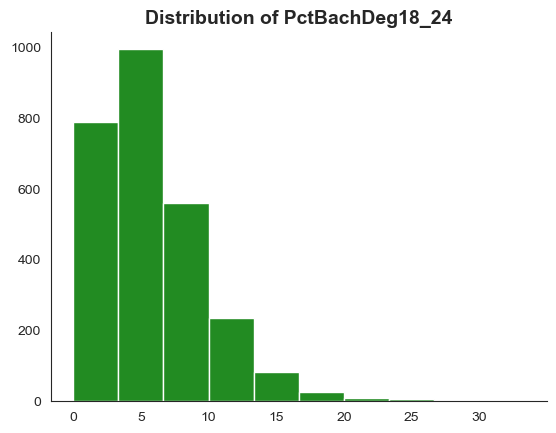

In [77]:
# Histogram after "shortening"
display_variable_hist('PctBachDeg18_24')

    17. PctHS25_Over

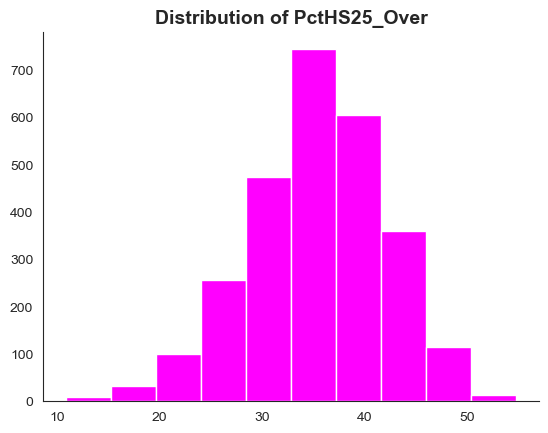

In [78]:
# Histogram before "shortening"
display_variable_hist('PctHS25_Over')

In [79]:
# Percentiles
display_variable_percentiles('PctHS25_Over')

10.8 Percentile:  0
23.7 Percentile:  5
27.0 Percentile:  10
28.6 Percentile:  15
30.1 Percentile:  20
31.25 Percentile:  25
32.2 Percentile:  30
33.3 Percentile:  35
34.1 Percentile:  40
34.9 Percentile:  45
35.6 Percentile:  50
36.4 Percentile:  55
37.2 Percentile:  60
38.1 Percentile:  65
39.0 Percentile:  70
40.0 Percentile:  75
41.1 Percentile:  80
42.3 Percentile:  85
43.6 Percentile:  90
45.69 Percentile:  95
54.8 Percentile:  100


    18. PctBachDeg25_Over

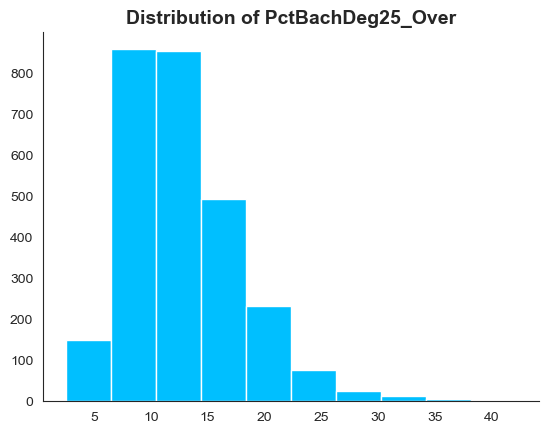

In [80]:
# Histogram before "shortening"
display_variable_hist('PctBachDeg25_Over')

In [81]:
# Percentiles
display_variable_percentiles('PctBachDeg25_Over')

2.5 Percentile:  0
6.3 Percentile:  5
7.3 Percentile:  10
8.0 Percentile:  15
8.6 Percentile:  20
9.2 Percentile:  25
9.76 Percentile:  30
10.2 Percentile:  35
10.7 Percentile:  40
11.4 Percentile:  45
11.9 Percentile:  50
12.6 Percentile:  55
13.2 Percentile:  60
13.9 Percentile:  65
14.6 Percentile:  70
15.4 Percentile:  75
16.36 Percentile:  80
17.7 Percentile:  85
19.4 Percentile:  90
21.9 Percentile:  95
42.2 Percentile:  100


    19. PctEmployed16_Over

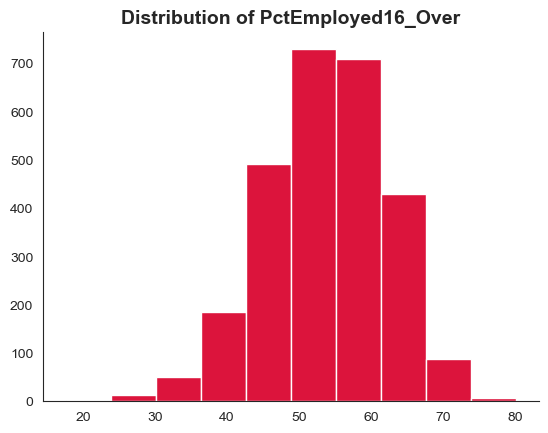

In [82]:
# Histogram before "shortening"
display_variable_hist('PctEmployed16_Over')

In [83]:
# Percentiles
display_variable_percentiles('PctEmployed16_Over')

17.6 Percentile:  0
39.7 Percentile:  5
43.2 Percentile:  10
45.2 Percentile:  15
46.8 Percentile:  20
48.2 Percentile:  25
49.5 Percentile:  30
50.9 Percentile:  35
52.0 Percentile:  40
53.0 Percentile:  45
54.1 Percentile:  50
55.3 Percentile:  55
56.5 Percentile:  60
57.6 Percentile:  65
58.8 Percentile:  70
59.9 Percentile:  75
61.2 Percentile:  80
62.6 Percentile:  85
64.2 Percentile:  90
66.3 Percentile:  95
80.1 Percentile:  100


    20. PctUnemployed16_Over

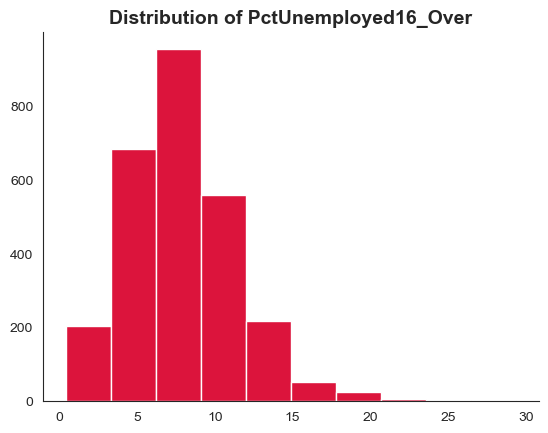

In [84]:
# Histogram before "shortening"
display_variable_hist('PctUnemployed16_Over')

In [85]:
# Percentiles
display_variable_percentiles('PctUnemployed16_Over')

0.4 Percentile:  0
2.71 Percentile:  5
3.7 Percentile:  10
4.4 Percentile:  15
5.0 Percentile:  20
5.4 Percentile:  25
5.9 Percentile:  30
6.3 Percentile:  35
6.7 Percentile:  40
7.1 Percentile:  45
7.5 Percentile:  50
7.9 Percentile:  55
8.3 Percentile:  60
8.8 Percentile:  65
9.3 Percentile:  70
9.7 Percentile:  75
10.3 Percentile:  80
11.1 Percentile:  85
12.2 Percentile:  90
13.8 Percentile:  95
29.4 Percentile:  100


    21. PctPrivateCoverage

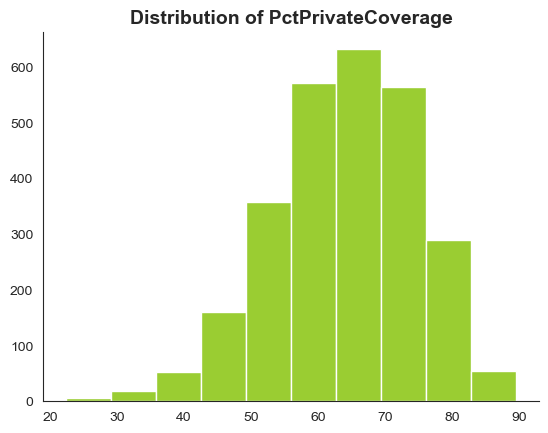

In [86]:
# Histogram before "shortening"
display_variable_hist('PctPrivateCoverage')

In [87]:
# Percentiles
display_variable_percentiles('PctPrivateCoverage')

22.3 Percentile:  0
46.21 Percentile:  5
49.9 Percentile:  10
52.7 Percentile:  15
55.0 Percentile:  20
56.9 Percentile:  25
58.66 Percentile:  30
60.2 Percentile:  35
61.7 Percentile:  40
63.3 Percentile:  45
64.8 Percentile:  50
66.2 Percentile:  55
67.8 Percentile:  60
69.1 Percentile:  65
70.3 Percentile:  70
71.8 Percentile:  75
73.5 Percentile:  80
75.47 Percentile:  85
77.4 Percentile:  90
80.4 Percentile:  95
89.6 Percentile:  100


    22. PctEmpPrivCoverage

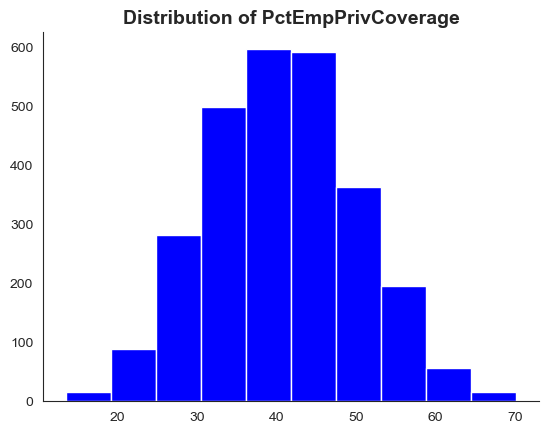

In [88]:
# Histogram before "shortening"
display_variable_hist('PctEmpPrivCoverage')

In [89]:
# Percentiles
display_variable_percentiles('PctEmpPrivCoverage')

13.5 Percentile:  0
25.8 Percentile:  5
28.7 Percentile:  10
30.8 Percentile:  15
32.5 Percentile:  20
34.1 Percentile:  25
35.4 Percentile:  30
36.7 Percentile:  35
38.1 Percentile:  40
39.4 Percentile:  45
40.6 Percentile:  50
42.0 Percentile:  55
43.22 Percentile:  60
44.33 Percentile:  65
45.7 Percentile:  70
47.0 Percentile:  75
48.66 Percentile:  80
50.6 Percentile:  85
53.1 Percentile:  90
56.1 Percentile:  95
70.2 Percentile:  100


    23. PctPublicCoverage

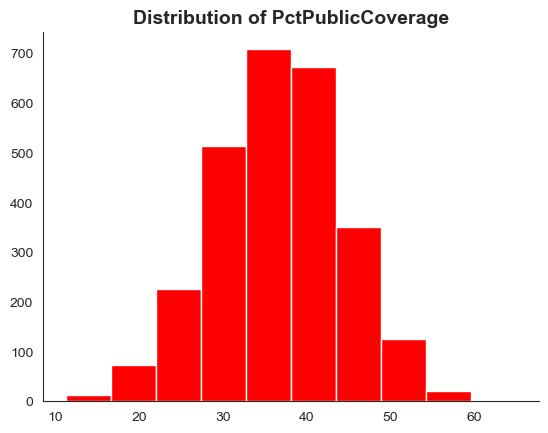

In [90]:
# Histogram before "shortening"
display_variable_hist('PctPublicCoverage')

In [91]:
# Percentiles
display_variable_percentiles('PctPublicCoverage')

11.2 Percentile:  0
23.6 Percentile:  5
26.7 Percentile:  10
28.4 Percentile:  15
29.9 Percentile:  20
31.3 Percentile:  25
32.6 Percentile:  30
33.8 Percentile:  35
34.9 Percentile:  40
35.9 Percentile:  45
36.8 Percentile:  50
37.8 Percentile:  55
38.8 Percentile:  60
39.7 Percentile:  65
40.7 Percentile:  70
42.0 Percentile:  75
43.26 Percentile:  80
44.6 Percentile:  85
46.5 Percentile:  90
49.29 Percentile:  95
65.1 Percentile:  100


    24. PctPublicCoverageAlone

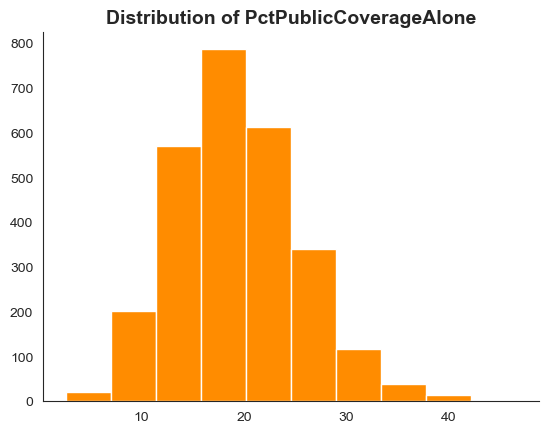

In [92]:
# Histogram before "shortening"
display_variable_hist('PctPublicCoverageAlone')

In [93]:
# Percentiles
display_variable_percentiles('PctPublicCoverageAlone')

2.6 Percentile:  0
10.2 Percentile:  5
11.92 Percentile:  10
13.0 Percentile:  15
14.0 Percentile:  20
15.0 Percentile:  25
15.8 Percentile:  30
16.7 Percentile:  35
17.4 Percentile:  40
18.2 Percentile:  45
18.9 Percentile:  50
19.7 Percentile:  55
20.6 Percentile:  60
21.4 Percentile:  65
22.3 Percentile:  70
23.3 Percentile:  75
24.3 Percentile:  80
25.7 Percentile:  85
27.1 Percentile:  90
30.1 Percentile:  95
46.6 Percentile:  100


    25. PctWhite

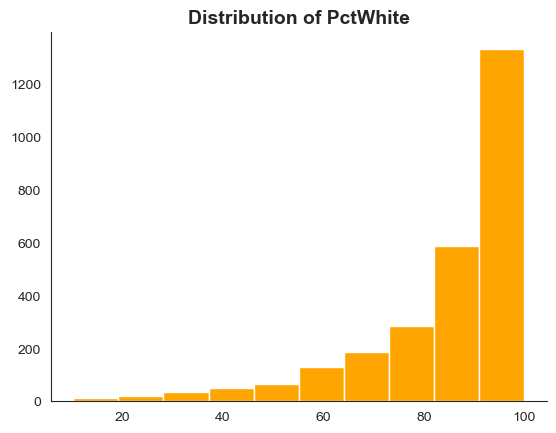

In [94]:
# Histogram before "shortening"
display_variable_hist('PctWhite')

In [95]:
# Percentiles
display_variable_percentiles('PctWhite')

10.2 Percentile:  0
48.46 Percentile:  5
61.64 Percentile:  10
68.76 Percentile:  15
74.67 Percentile:  20
79.37 Percentile:  25
82.73 Percentile:  30
85.62 Percentile:  35
87.65 Percentile:  40
89.31 Percentile:  45
90.83 Percentile:  50
92.09 Percentile:  55
93.13 Percentile:  60
94.13 Percentile:  65
94.8 Percentile:  70
95.59 Percentile:  75
96.21 Percentile:  80
96.71 Percentile:  85
97.23 Percentile:  90
97.77 Percentile:  95
100.0 Percentile:  100


26. PctBlack

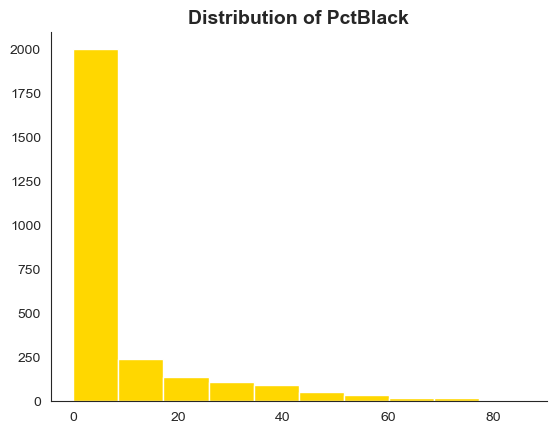

In [96]:
# Histogram before "shortening"
display_variable_hist('PctBlack')

In [97]:
# Percentiles
display_variable_percentiles('PctBlack')

0.0 Percentile:  0
0.09 Percentile:  5
0.23 Percentile:  10
0.36 Percentile:  15
0.48 Percentile:  20
0.59 Percentile:  25
0.75 Percentile:  30
0.93 Percentile:  35
1.19 Percentile:  40
1.49 Percentile:  45
2.02 Percentile:  50
2.61 Percentile:  55
3.49 Percentile:  60
4.72 Percentile:  65
6.47 Percentile:  70
9.24 Percentile:  75
13.65 Percentile:  80
20.84 Percentile:  85
30.16 Percentile:  90
42.02 Percentile:  95
85.95 Percentile:  100


27. PctAsian

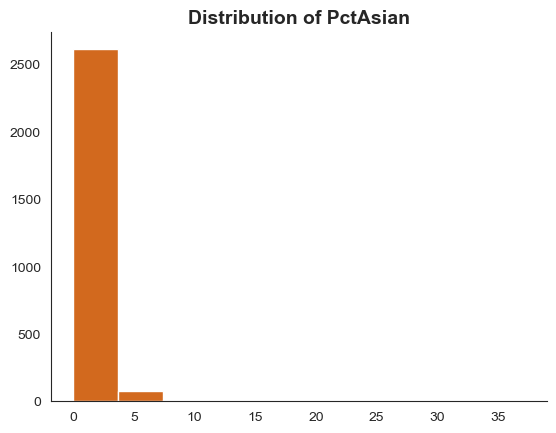

In [98]:
# Histogram before "shortening"
display_variable_hist('PctAsian')

In [99]:
# Percentiles
display_variable_percentiles('PctAsian')

0.0 Percentile:  0
0.0 Percentile:  5
0.05 Percentile:  10
0.11 Percentile:  15
0.17 Percentile:  20
0.23 Percentile:  25
0.29 Percentile:  30
0.34 Percentile:  35
0.4 Percentile:  40
0.45 Percentile:  45
0.51 Percentile:  50
0.58 Percentile:  55
0.64 Percentile:  60
0.75 Percentile:  65
0.87 Percentile:  70
1.05 Percentile:  75
1.24 Percentile:  80
1.55 Percentile:  85
2.09 Percentile:  90
3.15 Percentile:  95
37.16 Percentile:  100


In [100]:
# Shortening the dataframe
df_shorten('PctAsian', 10 ) 

2703
2693


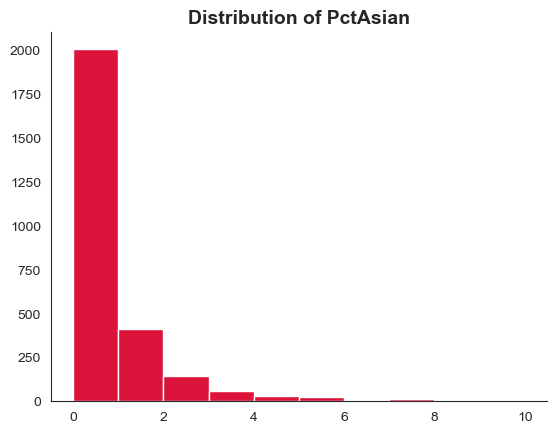

In [101]:
# Histogram after "shortening"
display_variable_hist('PctAsian')

28. PctOtherRace

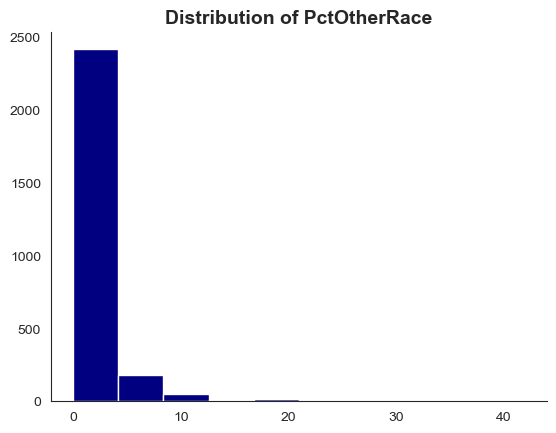

In [102]:
# Histogram before "shortening"
display_variable_hist('PctOtherRace')

In [103]:
# Percentiles
display_variable_percentiles('PctOtherRace')

0.0 Percentile:  0
0.01 Percentile:  5
0.08 Percentile:  10
0.14 Percentile:  15
0.21 Percentile:  20
0.27 Percentile:  25
0.35 Percentile:  30
0.43 Percentile:  35
0.53 Percentile:  40
0.63 Percentile:  45
0.75 Percentile:  50
0.91 Percentile:  55
1.05 Percentile:  60
1.26 Percentile:  65
1.56 Percentile:  70
1.9 Percentile:  75
2.42 Percentile:  80
3.09 Percentile:  85
4.25 Percentile:  90
6.91 Percentile:  95
41.93 Percentile:  100


In [104]:
# Shortening the dataframe
df_shorten('PctOtherRace', 25 )

2693
2682


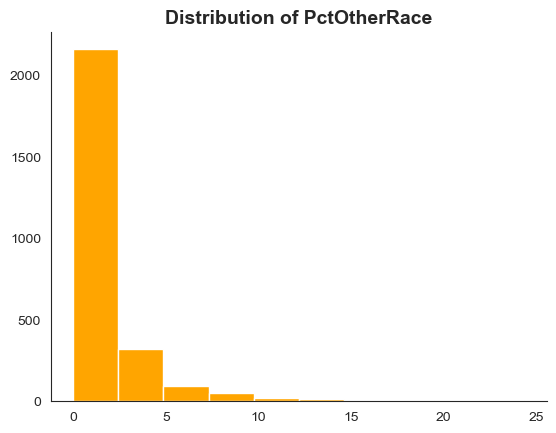

In [105]:
# Histogram after "shortening"
display_variable_hist('PctOtherRace')

29. PctMarriedHouseholds

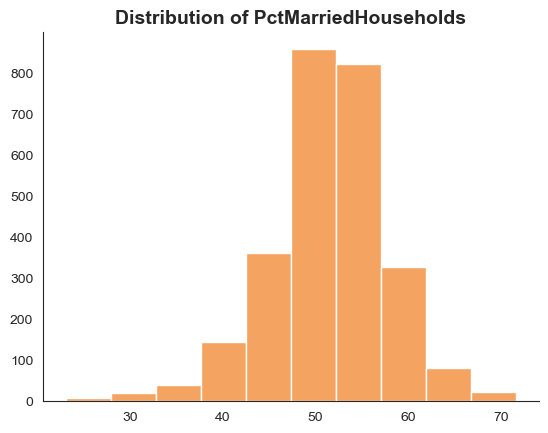

In [106]:
# Histogram before "shortening"
display_variable_hist('PctMarriedHouseholds')

In [107]:
# Percentiles
display_variable_percentiles('PctMarriedHouseholds')

22.99 Percentile:  0
40.55 Percentile:  5
43.59 Percentile:  10
45.58 Percentile:  15
47.1 Percentile:  20
48.03 Percentile:  25
49.03 Percentile:  30
49.79 Percentile:  35
50.49 Percentile:  40
51.18 Percentile:  45
51.79 Percentile:  50
52.46 Percentile:  55
53.21 Percentile:  60
53.87 Percentile:  65
54.62 Percentile:  70
55.45 Percentile:  75
56.38 Percentile:  80
57.38 Percentile:  85
58.65 Percentile:  90
61.06 Percentile:  95
71.7 Percentile:  100


30. BirthRate

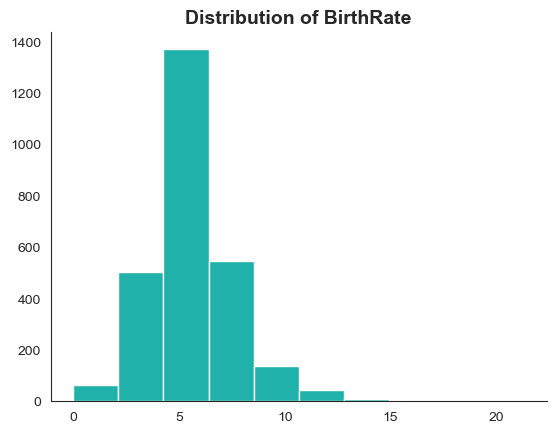

In [108]:
# Histogram before "shortening"
display_variable_hist('BirthRate')

In [109]:
# Percentiles
display_variable_percentiles('BirthRate')

0.0 Percentile:  0
2.83 Percentile:  5
3.51 Percentile:  10
3.9 Percentile:  15
4.2 Percentile:  20
4.48 Percentile:  25
4.69 Percentile:  30
4.88 Percentile:  35
5.03 Percentile:  40
5.22 Percentile:  45
5.41 Percentile:  50
5.64 Percentile:  55
5.81 Percentile:  60
6.04 Percentile:  65
6.29 Percentile:  70
6.59 Percentile:  75
6.92 Percentile:  80
7.31 Percentile:  85
8.04 Percentile:  90
9.3 Percentile:  95
21.33 Percentile:  100


In [110]:
# Shortening the dataframe
df_shorten('BirthRate', 18 ) 

2682
2680


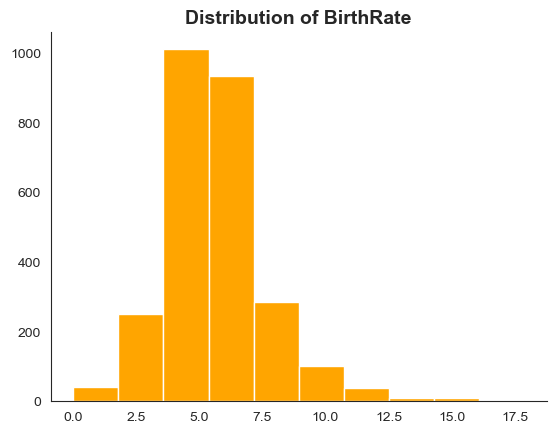

In [111]:
# Histogram after "shortening"
display_variable_hist('BirthRate')

## 4. SAVING THE REFINED DATASET

In [112]:
cancer_df.to_csv(r'cancer_reg_refined.csv', index=False)